# Data Imputation $\,\, \tiny\text{Analysis Lab | Ireland Commission for Energy Regulation (Energy)}$
<img src="banner lab.jpg" align=left />

<br>
### About the Business Situation & Data
___
Here we analyze electricity usage as monitored by a smart grid deployed in Dublin, Ireland in 2010-12, overseen by the Ireland Commission for Energy Regulation. Our dataset is called `DATASET CER 782.txt`.  Format is plain text, one observation per line with values separated by blank spaces. 

Each observation captures the electricity usage during a half-hour interval for one household, represented by 3 variables:
* **house_id:** A unique identifier for the household
* **timestamp:** A numeric code representing the day and time of the observation.  The first 3 digits indicate the number of days since the beginning of the program.  The last 2 digits indicate the half-hour interval within the day, where 1 means 12:00am to 12:30am, 2 means 12:30am to 1:00am, 3 means 1:00am to 1:30am, etc.
* **usage:** The amount of electricity used, measured in kWH.

<br>
### Apparatus
___

In [1]:
options(warn=-1)

# Load some required functions
library(reshape2, verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(ggplot2,  verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(plyr,     verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)

# Define some useful functions
move_column = function(d, n, p) { w = which(names(d) == n); x = setdiff(1:ncol(d), w); pre = if (p==1) c() else x[1:(p-1)]; post = if (p==length(d)) c() else x[p:length(x)]; d[, c(pre, w, post)] }
make_group_labels = function(d, unit_size) { rep(1:((nrow(d)/unit_size)+1), each=unit_size)[1:nrow(d)] }
                                 
# Set some visualization constants
PALETTE = c("#00A9FF", "#F8766D", "#7CAE00", "#C77CFF", "#CD9600", "#00BE67", "#FF61CC", "#00BFC4")

# Set some visualization formatting defaults
options(repr.matrix.max.cols=786)
options(repr.plot.width=8, repr.plot.height=3)
update_geom_defaults("line", list(size=0.15))
theme_update(plot.title=element_text(size=10, hjust=0.5), plot.subtitle=element_text(size=8, face="italic", hjust=0.5), axis.title=element_text(size=7), axis.text=element_text(size=7), strip.text=element_text(size=7), strip.text.y=element_text(angle=90), legend.title=element_blank(), legend.text=element_text(size=7))

<br>
### Data Retrieval
___

Retrieve the data assuming it is in .txt format, values separated by blank spaces.  Rename the 3 columns as `house_id`, `timestamp`, and `usage`, for convenience.  Show the table dimensions (i.e., number of rows and numebr of columns), the column types, the number of unique house ID's, and the first few rows of the table.

In [2]:
data.raw = read.table("../DATASETS/DATASET CER 782.txt", header=FALSE, sep=" ") # may take about 30 seconds
colnames(data.raw) = c("house_id", "timestamp", "usage")
dim(data.raw)
str(data.raw)
length(unique(data.raw$house_id))
head(data.raw)

[1] 20120860        3

'data.frame':	20120860 obs. of  3 variables:
 $ house_id : int  1804 1804 1804 1804 1804 1804 1804 1804 1804 1804 ...
 $ timestamp: int  19601 19604 19605 19602 19603 19501 19502 19503 19504 19505 ...
 $ usage    : num  0.102 0.172 0.122 0.175 0.175 0.096 0.126 0.086 0.123 0.1 ...


[1] 782

house_id timestamp usage
1 1804     19601     0.102
2 1804     19604     0.172
3 1804     19605     0.122
4 1804     19602     0.175
5 1804     19603     0.175
6 1804     19501     0.096

<br>
### Data Reformation
___

#### Cross-tabulate the data (at half-hourly resolution).
Cast `timestamp` as rows, `house_id` as columns.  Show the dimensions and first few rows of the cross-table. 

In [3]:
data = dcast(data.raw, timestamp ~ house_id, value.var="usage")
dim(data)
head(data)

[1] 25730   783

timestamp 1002  1014  1018  1022  1027  1030  1035  1036  1058  1059  1060 
1 19501     0.362 0.204 1.757 0.105 0.040 0.265 0.126 0.303 0.225 0.290 0.016
2 19502     0.064 0.393 1.646 0.124 0.060 0.393 0.053 0.232 0.116 0.267 0.046
3 19503     0.119 0.210 1.607 0.100 0.052 0.114 0.045 0.176 0.190 0.280 0.042
4 19504     0.023 0.153 1.618 0.117 0.050 0.046 0.054 0.034 0.116 0.180 0.023
5 19505     0.140 0.181 1.533 0.075 0.059 0.097 0.054 0.103 0.144 0.311 0.026
6 19506     0.036 0.196 1.568 0.093 0.041 0.045 0.040 0.037 0.148 0.224 0.045
  1073  1074  1076  1107  1119  1120  1130  1141  1144  1157  1164  1171  1212 
1 0.219 0.016 0.189 0.135 0.315 0.040 0.133 0.109 0.537 0.481 0.239 0.731 0.255
2 0.147 0.011 0.108 0.122 0.200 0.016 0.132 0.217 0.531 0.721 0.248 0.666 0.181
3 0.145 0.023 0.106 0.130 0.335 0.041 0.131 0.726 0.320 0.471 0.223 0.643 0.180
4 0.142 0.016 0.085 0.142 0.209 0.016 0.124 0.190 0.286 0.369 0.220 0.661 0.162
5 0.142 0.012 0.086 0.142 0.311 0.041 0.125 0.163 0.330 0.405 0.246 0.690 0.179
6 0.203 0.024 0.095 0.142 0.206 0.016 0.125 0.204 0.323 0.383 0.246 0.663 0.179
  1217  1225  1229  1239  1255  1257  1262  1274  1277  1281  1286  1301  1312 
1 0.298 0.246 0.779 0.300 0.056 0.159 0.058 0.218 0.575 0.283 0.378 0.188 0.140
2 0.724 0.330 0.424 0.401 0.126 0.161 0.057 0.273 0.522 0.202 0.363 0.061 0.051
3 0.449 0.342 0.228 0.386 0.082 0.135 0.061 0.219 0.459 0.265 0.355 0.068 0.085
4 0.235 0.310 0.149 0.395 0.055 0.159 0.056 0.169 0.419 0.180 0.425 0.180 0.054
5 0.233 0.331 0.214 0.280 0.124 0.162 0.055 0.182 0.107 0.259 0.304 0.068 0.081
6 0.295 0.349 0.297 0.397 0.079 0.131 0.057 0.211 0.036 0.151 0.189 0.035 0.035
  1316  1317  1331  1336  1364  1365  1371  1376  1388  1425  1428  1435  1440 
1 0.282 0.167 0.286 0.328 0.074 0.669 0.226 0.375 0.038 0.219 0.337 0.123 0.248
2 0.279 0.126 0.309 0.329 0.056 0.589 0.108 0.307 0.034 0.171 0.291 0.121 0.250
3 0.264 0.086 0.279 0.329 0.023 0.591 0.086 0.156 0.142 0.226 0.227 0.127 0.222
4 0.110 0.090 0.232 0.327 0.044 0.430 0.164 0.131 0.045 0.277 0.212 0.127 0.289
5 0.054 0.170 0.217 0.345 0.048 0.305 0.080 0.094 0.035 0.215 0.163 0.123 0.282
6 0.087 0.164 0.215 0.343 0.025 0.071 0.101 0.211 0.132 0.226 0.203 0.121 0.149
  1463  1480  1492  1494  1498  1502  1507  1517  1530  1532  1537  1539  1546 
1 0.138 0.088 0.016 0.252 0.578 0.015 0.108 0.109 0.221 0.555 0.178 0.156 0.070
2 0.337 0.061 0.016 0.213 0.318 0.067 0.051 0.113 0.203 0.403 0.114 0.145 0.097
3 0.223 0.091 0.015 0.131 0.325 0.116 0.022 0.126 0.185 0.422 0.108 0.145 0.150
4 0.280 0.058 0.020 0.175 0.396 0.082 0.127 0.540 0.209 0.536 0.140 0.155 0.071
5 0.159 0.100 0.110 0.245 0.301 0.015 0.032 0.136 0.175 0.530 0.101 0.131 0.064
6 0.163 0.045 0.172 0.170 0.303 0.069 0.027 0.087 0.208 0.439 0.110 0.880 0.073
  1548  1551  1561  1567  1573  1575  1592  1599  1607  1609  1624  1635  1639 
1 0.294 0.652 0.504 0.366 1.111 0.122 0.127 0.347 0.024 0.205 0.105 0.124 0.085
2 0.277 0.270 0.564 0.388 1.403 0.030 0.217 0.233 0.031 0.199 0.132 0.180 0.084
3 0.213 0.154 0.596 0.241 0.177 0.018 0.119 0.237 0.032 0.212 0.121 0.125 0.120
4 0.236 0.094 0.373 0.091 0.155 0.018 0.108 0.238 0.032 0.180 0.052 0.113 0.171
5 0.215 0.091 0.288 0.262 0.291 0.111 0.184 0.236 0.032 0.160 0.103 0.142 0.119
6 0.217 0.090 0.205 0.316 0.081 0.131 0.087 0.232 0.019 0.173 0.160 0.171 0.086
  1657  1660  1661  1664  1667  1670  1673  1679  1682  1695  1700  1711  1720 
1 0.056 0.545 1.537 0.066 0.022 0.361 0.386 0.067 0.074 0.249 0.060 0.091 0.107
2 0.061 0.411 1.402 0.106 0.034 0.212 0.337 0.083 0.050 0.230 0.100 0.025 0.106
3 0.054 0.419 1.436 0.067 0.124 0.188 0.148 0.135 0.014 0.053 0.076 0.050 0.162
4 0.051 0.454 1.388 0.066 0.115 0.211 0.138 0.113 0.050 0.053 0.046 0.088 0.218
5 0.061 0.416 1.289 0.108 0.112 0.209 0.160 0.074 0.014 0.124 0.101 0.027 0.106
6 0.052 0.519 1.381 0.066 0.109 0.177 0.110 0.108 0.050 0.126 0.077 0.049 0.128
  1722  1724  1727  1736  1742  1752  1754  1760  1763  1768  1797  1804  1807 
1 0.126 0.095 0.

<br>
Add columns to the cross-table, one for `day` and one for `time`, calculated based on `timestamp`.  Position these new columns 2nd and 3rd.  These new columns will be useful later.  Show the dimensions and first few rows of the resulting cross-table.  

In [4]:
data$day  = data$timestamp %/% 100
data$time = data$timestamp %% 100

data = move_column(data, "day", 2)
data = move_column(data, "time", 3)

dim(data)
head(data)

[1] 25730   785

timestamp day time 1002  1014  1018  1022  1027  1030  1035  1036  1058 
1 19501     195 1    0.362 0.204 1.757 0.105 0.040 0.265 0.126 0.303 0.225
2 19502     195 2    0.064 0.393 1.646 0.124 0.060 0.393 0.053 0.232 0.116
3 19503     195 3    0.119 0.210 1.607 0.100 0.052 0.114 0.045 0.176 0.190
4 19504     195 4    0.023 0.153 1.618 0.117 0.050 0.046 0.054 0.034 0.116
5 19505     195 5    0.140 0.181 1.533 0.075 0.059 0.097 0.054 0.103 0.144
6 19506     195 6    0.036 0.196 1.568 0.093 0.041 0.045 0.040 0.037 0.148
  1059  1060  1073  1074  1076  1107  1119  1120  1130  1141  1144  1157  1164 
1 0.290 0.016 0.219 0.016 0.189 0.135 0.315 0.040 0.133 0.109 0.537 0.481 0.239
2 0.267 0.046 0.147 0.011 0.108 0.122 0.200 0.016 0.132 0.217 0.531 0.721 0.248
3 0.280 0.042 0.145 0.023 0.106 0.130 0.335 0.041 0.131 0.726 0.320 0.471 0.223
4 0.180 0.023 0.142 0.016 0.085 0.142 0.209 0.016 0.124 0.190 0.286 0.369 0.220
5 0.311 0.026 0.142 0.012 0.086 0.142 0.311 0.041 0.125 0.163 0.330 0.405 0.246
6 0.224 0.045 0.203 0.024 0.095 0.142 0.206 0.016 0.125 0.204 0.323 0.383 0.246
  1171  1212  1217  1225  1229  1239  1255  1257  1262  1274  1277  1281  1286 
1 0.731 0.255 0.298 0.246 0.779 0.300 0.056 0.159 0.058 0.218 0.575 0.283 0.378
2 0.666 0.181 0.724 0.330 0.424 0.401 0.126 0.161 0.057 0.273 0.522 0.202 0.363
3 0.643 0.180 0.449 0.342 0.228 0.386 0.082 0.135 0.061 0.219 0.459 0.265 0.355
4 0.661 0.162 0.235 0.310 0.149 0.395 0.055 0.159 0.056 0.169 0.419 0.180 0.425
5 0.690 0.179 0.233 0.331 0.214 0.280 0.124 0.162 0.055 0.182 0.107 0.259 0.304
6 0.663 0.179 0.295 0.349 0.297 0.397 0.079 0.131 0.057 0.211 0.036 0.151 0.189
  1301  1312  1316  1317  1331  1336  1364  1365  1371  1376  1388  1425  1428 
1 0.188 0.140 0.282 0.167 0.286 0.328 0.074 0.669 0.226 0.375 0.038 0.219 0.337
2 0.061 0.051 0.279 0.126 0.309 0.329 0.056 0.589 0.108 0.307 0.034 0.171 0.291
3 0.068 0.085 0.264 0.086 0.279 0.329 0.023 0.591 0.086 0.156 0.142 0.226 0.227
4 0.180 0.054 0.110 0.090 0.232 0.327 0.044 0.430 0.164 0.131 0.045 0.277 0.212
5 0.068 0.081 0.054 0.170 0.217 0.345 0.048 0.305 0.080 0.094 0.035 0.215 0.163
6 0.035 0.035 0.087 0.164 0.215 0.343 0.025 0.071 0.101 0.211 0.132 0.226 0.203
  1435  1440  1463  1480  1492  1494  1498  1502  1507  1517  1530  1532  1537 
1 0.123 0.248 0.138 0.088 0.016 0.252 0.578 0.015 0.108 0.109 0.221 0.555 0.178
2 0.121 0.250 0.337 0.061 0.016 0.213 0.318 0.067 0.051 0.113 0.203 0.403 0.114
3 0.127 0.222 0.223 0.091 0.015 0.131 0.325 0.116 0.022 0.126 0.185 0.422 0.108
4 0.127 0.289 0.280 0.058 0.020 0.175 0.396 0.082 0.127 0.540 0.209 0.536 0.140
5 0.123 0.282 0.159 0.100 0.110 0.245 0.301 0.015 0.032 0.136 0.175 0.530 0.101
6 0.121 0.149 0.163 0.045 0.172 0.170 0.303 0.069 0.027 0.087 0.208 0.439 0.110
  1539  1546  1548  1551  1561  1567  1573  1575  1592  1599  1607  1609  1624 
1 0.156 0.070 0.294 0.652 0.504 0.366 1.111 0.122 0.127 0.347 0.024 0.205 0.105
2 0.145 0.097 0.277 0.270 0.564 0.388 1.403 0.030 0.217 0.233 0.031 0.199 0.132
3 0.145 0.150 0.213 0.154 0.596 0.241 0.177 0.018 0.119 0.237 0.032 0.212 0.121
4 0.155 0.071 0.236 0.094 0.373 0.091 0.155 0.018 0.108 0.238 0.032 0.180 0.052
5 0.131 0.064 0.215 0.091 0.288 0.262 0.291 0.111 0.184 0.236 0.032 0.160 0.103
6 0.880 0.073 0.217 0.090 0.205 0.316 0.081 0.131 0.087 0.232 0.019 0.173 0.160
  1635  1639  1657  1660  1661  1664  1667  1670  1673  1679  1682  1695  1700 
1 0.124 0.085 0.056 0.545 1.537 0.066 0.022 0.361 0.386 0.067 0.074 0.249 0.060
2 0.180 0.084 0.061 0.411 1.402 0.106 0.034 0.212 0.337 0.083 0.050 0.230 0.100
3 0.125 0.120 0.054 0.419 1.436 0.067 0.124 0.188 0.148 0.135 0.014 0.053 0.076
4 0.113 0.171 0.051 0.454 1.388 0.066 0.115 0.211 0.138 0.113 0.050 0.053 0.046
5 0.142 0.119 0.061 0.416 1.289 0.108 0.112 0.209 0.160 0.074 0.014 0.124 0.101
6 0.171 0.086 0.052 0.519 1.381 0.066 0.109 0.177 0.110 0.108 0.050 0.126 0.077
  1711  1720  1722  1724  1727  1736  1742  1752  1754  1760  1763  1768  1797 
1 0.091 0.107 0.126 0.095 0.400 0.399

<br>
Plot the electricity usage of the house called `1002` vs. time (at half-hourly resolution).  

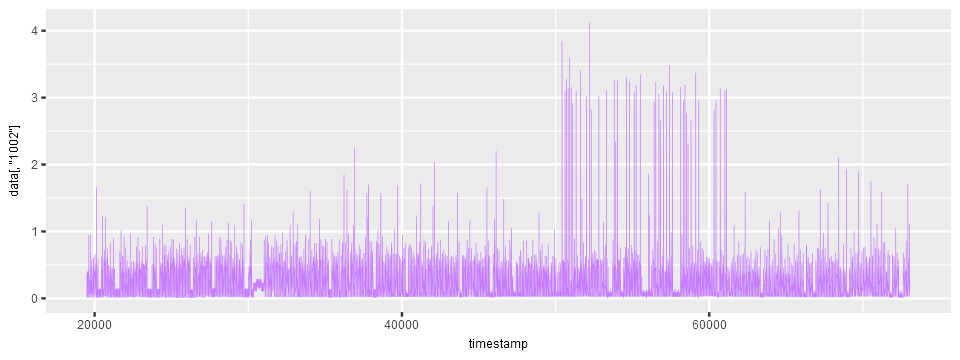

In [5]:
ggplot(data) +
geom_line(aes(x=timestamp, y=data[,"1002"]), color=PALETTE[4]) # note: special notation to disambiguate column name 1002 vs. number 1002

<br>
Add a column to the cross-table for the aggregate electricity usage.  Position this new column 4th.  Show the dimensions and first few rows of resulting cross-table. 

In [6]:
data.hh = data
data.hh$sum = rowSums(data.hh[, -(1:3)])
data.hh = move_column(data.hh, "sum", 4)
dim(data.hh)
head(data.hh)

[1] 25730   786

timestamp day time sum     1002  1014  1018  1022  1027  1030  1035  1036 
1 19501     195 1    253.046 0.362 0.204 1.757 0.105 0.040 0.265 0.126 0.303
2 19502     195 2    206.840 0.064 0.393 1.646 0.124 0.060 0.393 0.053 0.232
3 19503     195 3    180.209 0.119 0.210 1.607 0.100 0.052 0.114 0.045 0.176
4 19504     195 4    154.859 0.023 0.153 1.618 0.117 0.050 0.046 0.054 0.034
5 19505     195 5    147.450 0.140 0.181 1.533 0.075 0.059 0.097 0.054 0.103
6 19506     195 6    143.492 0.036 0.196 1.568 0.093 0.041 0.045 0.040 0.037
  1058  1059  1060  1073  1074  1076  1107  1119  1120  1130  1141  1144  1157 
1 0.225 0.290 0.016 0.219 0.016 0.189 0.135 0.315 0.040 0.133 0.109 0.537 0.481
2 0.116 0.267 0.046 0.147 0.011 0.108 0.122 0.200 0.016 0.132 0.217 0.531 0.721
3 0.190 0.280 0.042 0.145 0.023 0.106 0.130 0.335 0.041 0.131 0.726 0.320 0.471
4 0.116 0.180 0.023 0.142 0.016 0.085 0.142 0.209 0.016 0.124 0.190 0.286 0.369
5 0.144 0.311 0.026 0.142 0.012 0.086 0.142 0.311 0.041 0.125 0.163 0.330 0.405
6 0.148 0.224 0.045 0.203 0.024 0.095 0.142 0.206 0.016 0.125 0.204 0.323 0.383
  1164  1171  1212  1217  1225  1229  1239  1255  1257  1262  1274  1277  1281 
1 0.239 0.731 0.255 0.298 0.246 0.779 0.300 0.056 0.159 0.058 0.218 0.575 0.283
2 0.248 0.666 0.181 0.724 0.330 0.424 0.401 0.126 0.161 0.057 0.273 0.522 0.202
3 0.223 0.643 0.180 0.449 0.342 0.228 0.386 0.082 0.135 0.061 0.219 0.459 0.265
4 0.220 0.661 0.162 0.235 0.310 0.149 0.395 0.055 0.159 0.056 0.169 0.419 0.180
5 0.246 0.690 0.179 0.233 0.331 0.214 0.280 0.124 0.162 0.055 0.182 0.107 0.259
6 0.246 0.663 0.179 0.295 0.349 0.297 0.397 0.079 0.131 0.057 0.211 0.036 0.151
  1286  1301  1312  1316  1317  1331  1336  1364  1365  1371  1376  1388  1425 
1 0.378 0.188 0.140 0.282 0.167 0.286 0.328 0.074 0.669 0.226 0.375 0.038 0.219
2 0.363 0.061 0.051 0.279 0.126 0.309 0.329 0.056 0.589 0.108 0.307 0.034 0.171
3 0.355 0.068 0.085 0.264 0.086 0.279 0.329 0.023 0.591 0.086 0.156 0.142 0.226
4 0.425 0.180 0.054 0.110 0.090 0.232 0.327 0.044 0.430 0.164 0.131 0.045 0.277
5 0.304 0.068 0.081 0.054 0.170 0.217 0.345 0.048 0.305 0.080 0.094 0.035 0.215
6 0.189 0.035 0.035 0.087 0.164 0.215 0.343 0.025 0.071 0.101 0.211 0.132 0.226
  1428  1435  1440  1463  1480  1492  1494  1498  1502  1507  1517  1530  1532 
1 0.337 0.123 0.248 0.138 0.088 0.016 0.252 0.578 0.015 0.108 0.109 0.221 0.555
2 0.291 0.121 0.250 0.337 0.061 0.016 0.213 0.318 0.067 0.051 0.113 0.203 0.403
3 0.227 0.127 0.222 0.223 0.091 0.015 0.131 0.325 0.116 0.022 0.126 0.185 0.422
4 0.212 0.127 0.289 0.280 0.058 0.020 0.175 0.396 0.082 0.127 0.540 0.209 0.536
5 0.163 0.123 0.282 0.159 0.100 0.110 0.245 0.301 0.015 0.032 0.136 0.175 0.530
6 0.203 0.121 0.149 0.163 0.045 0.172 0.170 0.303 0.069 0.027 0.087 0.208 0.439
  1537  1539  1546  1548  1551  1561  1567  1573  1575  1592  1599  1607  1609 
1 0.178 0.156 0.070 0.294 0.652 0.504 0.366 1.111 0.122 0.127 0.347 0.024 0.205
2 0.114 0.145 0.097 0.277 0.270 0.564 0.388 1.403 0.030 0.217 0.233 0.031 0.199
3 0.108 0.145 0.150 0.213 0.154 0.596 0.241 0.177 0.018 0.119 0.237 0.032 0.212
4 0.140 0.155 0.071 0.236 0.094 0.373 0.091 0.155 0.018 0.108 0.238 0.032 0.180
5 0.101 0.131 0.064 0.215 0.091 0.288 0.262 0.291 0.111 0.184 0.236 0.032 0.160
6 0.110 0.880 0.073 0.217 0.090 0.205 0.316 0.081 0.131 0.087 0.232 0.019 0.173
  1624  1635  1639  1657  1660  1661  1664  1667  1670  1673  1679  1682  1695 
1 0.105 0.124 0.085 0.056 0.545 1.537 0.066 0.022 0.361 0.386 0.067 0.074 0.249
2 0.132 0.180 0.084 0.061 0.411 1.402 0.106 0.034 0.212 0.337 0.083 0.050 0.230
3 0.121 0.125 0.120 0.054 0.419 1.436 0.067 0.124 0.188 0.148 0.135 0.014 0.053
4 0.052 0.113 0.171 0.051 0.454 1.388 0.066 0.115 0.211 0.138 0.113 0.050 0.053
5 0.103 0.142 0.119 0.061 0.416 1.289 0.108 0.112 0.209 0.160 0.074 0.014 0.124
6 0.160 0.171 0.086 0.052 0.519 1.381 0.066 0.109 0.177 0.110 0.108 0.050 0.126
  1700  1711  1720  1722  1724  1727  1736  1742  1752  1754  1760  1763  1768 
1 0.060 0.091 0.107 0.1

<br>
Plot the aggregate electricity usage vs. time (at half-hourly resolution).  Note the seasonality, more electricity is used in winter than in summer.  

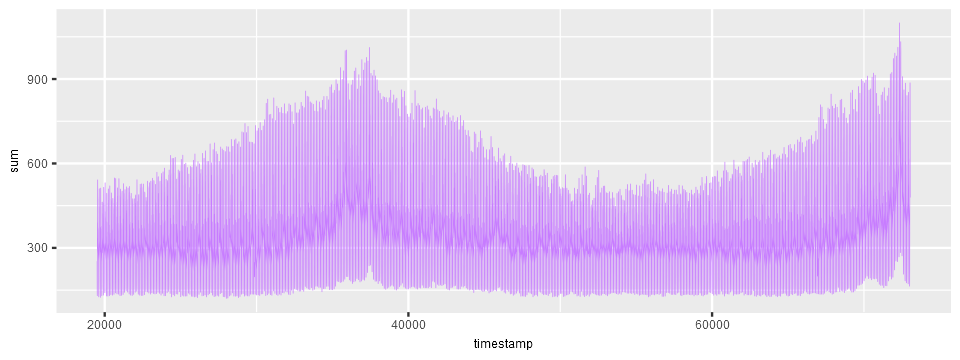

In [7]:
ggplot(data.hh) +
geom_line(aes(x=timestamp, y=sum), color=PALETTE[4])

<br>
#### Cross-tabulate the data at daily resolution.

Show the time span over which observations are made in terms of number of half-hour intervals, number of days, and number of years.

In [8]:
nrow(data) # number of time units
nrow(data)/2/24 # number of days
nrow(data)/2/24/365 # number of years

[1] 25730

[1] 536.0417

[1] 1.468607

<br>
Construct a grouping vector that can be used to organize observations into 48 half-hour groups.  The vector comprises 48 1's, followed by 48 2's, followed by 48 3's, etc.

In [9]:
group = make_group_labels(data, 48)
head(group, 135)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

<br>
Reform the data to daily resolution, based on the grouping vector - for each 48 half-hour period, aggregate row values by group within each column.    

In [10]:
i = seq(1, length(group), 48)
head(i)

data.day.ID = data[i, 1:3]
head(data.day.ID)

data.day.value = rowsum(data[,-(1:3)], group=group) # sums each column across a group of rows - this is not the same as rowSums()
head(data.day.value)

data.day.based_on_48 = cbind(data.day.ID, data.day.value)
dim(data.day.based_on_48)
head(data.day.based_on_48)

[1]   1  49  97 145 193 241

timestamp day time
1   19501     195 1   
49  19601     196 1   
97  19701     197 1   
145 19801     198 1   
193 19901     199 1   
241 20001     200 1

1002   1014   1018   1022   1027  1030   1035   1036   1058   1059   1060  
1  6.355 34.085 50.537 18.392 6.592 18.871  7.619  8.634 13.358 34.338  4.919
2  8.972 32.544 52.621 17.287 5.640 14.638 14.728  8.433 16.258 15.915  4.030
3  8.794 31.324 42.536 14.899 8.619 10.801  9.150  9.763 17.992 23.650 11.290
4  8.306 36.053 44.322 17.034 7.374  5.186  9.895  9.299 14.250 35.466  5.190
5 10.119 37.845 37.231 23.125 6.716 16.435  5.309 12.640 19.544 44.161  4.126
6  7.838 32.839 36.839  7.743 6.482 12.781  5.032 12.406 18.674 37.874  9.179
  1073   1074   1076   1107   1119   1120  1130   1141   1144   1157   1164  
1 43.316 12.115 20.806  4.362 33.677 4.086 34.353 37.462 24.987 33.609 31.563
2 49.737  7.870 17.831 21.510 43.081 8.588 22.908 38.236 40.683 26.135 29.307
3 38.484  6.230 20.691 16.940 41.726 1.556 35.926 38.398 16.729 20.224 24.884
4 42.226 14.935 14.565 18.380 35.285 2.129 19.793 28.100 15.347 25.248 25.224
5 57.909  6.966 28.657 22.020 76.450 5.111 40.331 47.599 18.386 36.665 31.516
6 37.855  5.929 20.040 25.431 53.860 3.519 37.422 42.102 35.423 25.177 61.355
  1171   1212   1217   1225   1229   1239   1255   1257   1262   1274   1277  
1 46.358 16.779 42.244 19.164 22.931 16.255 14.781 13.627  9.312 21.634 25.040
2 32.012 22.185 51.389 18.230 27.335 17.523 15.991 14.228 20.724 11.060  7.990
3 34.797 19.503 45.887 16.291 31.060 18.309  9.063 14.375  8.065 18.014  9.012
4 62.374 23.136 37.476 14.607 36.266 26.141 16.258 17.260  6.101 25.912  0.334
5 57.670 27.263 25.049 16.192 55.797 31.667 14.609 15.820  7.087 15.449  0.386
6 45.489 18.328 21.450 12.181 46.209 22.266 15.252 16.112  8.616 11.668  0.351
  1281   1286   1301   1312  1316  1317   1331   1336   1364   1365   1371  
1 32.926 16.417 10.815 3.238 4.996 19.669 16.702 19.221 12.436  7.289 39.310
2 26.059 17.079 22.254 2.940 6.600 28.950 15.633 28.496 14.221  8.870 16.595
3 24.545 16.693 25.938 3.017 5.789 21.875 15.173 17.787 11.497  8.143 51.062
4 60.076 16.476 23.396 3.115 6.705 19.740 16.574 20.208  8.368 11.263 38.766
5 29.294 22.602 21.826 2.967 4.025 19.130 11.565 38.175 17.656 16.710 20.846
6 32.608 12.884 23.821 2.740 1.905 19.155 19.053 35.007 11.960 22.935 25.207
  1376   1388  1425   1428   1435   1440   1463   1480  1492  1494   1498  
1 17.289 5.840 11.149  9.939 11.288 10.857 23.701 3.534 3.306 43.600 42.554
2 46.553 5.468 10.998  9.996  7.151 11.846 32.385 3.535 3.766 49.806 35.753
3 45.312 5.264 10.505 12.684  6.856  8.165 21.352 3.544 6.095 44.657 25.703
4 50.120 5.794 10.626 17.398  6.962 11.429 21.923 3.577 2.889 41.923 17.012
5 59.638 7.132 10.866 29.884 10.953 10.287 14.805 3.578 6.504 46.209 30.858
6 39.263 6.477 30.866 22.417  9.715  9.343 12.821 3.569 6.320 26.498 23.610
  1502   1507  1517   1530   1532   1537   1539   1546  1548   1551   1561  
1 19.657 6.431 19.492  9.495 40.657 24.557 32.934 4.101 29.502 13.519 43.005
2 18.752 6.246 14.238 10.438 27.117 12.706 40.610 4.356 19.698 10.196 23.209
3 19.110 6.175 22.609 10.430 31.648 23.535 35.197 4.386 20.800 17.424 23.639
4 15.293 6.108 20.314  8.192 32.249 17.194 38.160 3.813 24.658 12.131 28.317
5 20.204 6.284 19.091  8.265 32.758 23.185 35.919 3.666 39.613 11.337 28.026
6 12.293 6.726 18.233  8.244 34.273 25.748 38.823 4.147 33.218 10.657 31.046
  1567   1573   1575   1592   1599   1607  1609   1624   1635   1639   1657  
1 22.482 37.466 21.404 26.359 17.281 1.351 15.447 17.206 25.704 11.367  2.602
2 22.645 41.410 18.086 18.325 13.901 1.362 12.096 20.108 30.844  9.795  2.623
3 18.021 23.927 21.093 12.501 12.011 1.560 19.709 30.495 35.108 17.587  4.893
4 24.549 24.593 30.760 10.766 10.559 1.641 16.324 16.432 33.109 13.023 14.132
5 18.230 20.458 27.240 16.113 10.604 2.616 22.324 27.496 37.830 12.149  4.233
6 20.396 47.113 34.681  9.504  8.137 1.376 20.233 17.765 31.657 13.024  1.300
  1660   1661   1664   1667   1670   1673   1679   1682  1695   1700  1711 
1 29.235 59.870 10.526 13.857 23.617 29.550 16.918 4.257 14.758 4.064 2.842
2 35.129 26.017  9.841  7.978 11.827 22.891 13.75

[1] 537 785

timestamp day time 1002   1014   1018   1022   1027  1030   1035   1036  
1   19501     195 1     6.355 34.085 50.537 18.392 6.592 18.871  7.619  8.634
49  19601     196 1     8.972 32.544 52.621 17.287 5.640 14.638 14.728  8.433
97  19701     197 1     8.794 31.324 42.536 14.899 8.619 10.801  9.150  9.763
145 19801     198 1     8.306 36.053 44.322 17.034 7.374  5.186  9.895  9.299
193 19901     199 1    10.119 37.845 37.231 23.125 6.716 16.435  5.309 12.640
241 20001     200 1     7.838 32.839 36.839  7.743 6.482 12.781  5.032 12.406
    1058   1059   1060   1073   1074   1076   1107   1119   1120  1130   1141  
1   13.358 34.338  4.919 43.316 12.115 20.806  4.362 33.677 4.086 34.353 37.462
49  16.258 15.915  4.030 49.737  7.870 17.831 21.510 43.081 8.588 22.908 38.236
97  17.992 23.650 11.290 38.484  6.230 20.691 16.940 41.726 1.556 35.926 38.398
145 14.250 35.466  5.190 42.226 14.935 14.565 18.380 35.285 2.129 19.793 28.100
193 19.544 44.161  4.126 57.909  6.966 28.657 22.020 76.450 5.111 40.331 47.599
241 18.674 37.874  9.179 37.855  5.929 20.040 25.431 53.860 3.519 37.422 42.102
    1144   1157   1164   1171   1212   1217   1225   1229   1239   1255  
1   24.987 33.609 31.563 46.358 16.779 42.244 19.164 22.931 16.255 14.781
49  40.683 26.135 29.307 32.012 22.185 51.389 18.230 27.335 17.523 15.991
97  16.729 20.224 24.884 34.797 19.503 45.887 16.291 31.060 18.309  9.063
145 15.347 25.248 25.224 62.374 23.136 37.476 14.607 36.266 26.141 16.258
193 18.386 36.665 31.516 57.670 27.263 25.049 16.192 55.797 31.667 14.609
241 35.423 25.177 61.355 45.489 18.328 21.450 12.181 46.209 22.266 15.252
    1257   1262   1274   1277   1281   1286   1301   1312  1316  1317   1331  
1   13.627  9.312 21.634 25.040 32.926 16.417 10.815 3.238 4.996 19.669 16.702
49  14.228 20.724 11.060  7.990 26.059 17.079 22.254 2.940 6.600 28.950 15.633
97  14.375  8.065 18.014  9.012 24.545 16.693 25.938 3.017 5.789 21.875 15.173
145 17.260  6.101 25.912  0.334 60.076 16.476 23.396 3.115 6.705 19.740 16.574
193 15.820  7.087 15.449  0.386 29.294 22.602 21.826 2.967 4.025 19.130 11.565
241 16.112  8.616 11.668  0.351 32.608 12.884 23.821 2.740 1.905 19.155 19.053
    1336   1364   1365   1371   1376   1388  1425   1428   1435   1440   1463  
1   19.221 12.436  7.289 39.310 17.289 5.840 11.149  9.939 11.288 10.857 23.701
49  28.496 14.221  8.870 16.595 46.553 5.468 10.998  9.996  7.151 11.846 32.385
97  17.787 11.497  8.143 51.062 45.312 5.264 10.505 12.684  6.856  8.165 21.352
145 20.208  8.368 11.263 38.766 50.120 5.794 10.626 17.398  6.962 11.429 21.923
193 38.175 17.656 16.710 20.846 59.638 7.132 10.866 29.884 10.953 10.287 14.805
241 35.007 11.960 22.935 25.207 39.263 6.477 30.866 22.417  9.715  9.343 12.821
    1480  1492  1494   1498   1502   1507  1517   1530   1532   1537   1539  
1   3.534 3.306 43.600 42.554 19.657 6.431 19.492  9.495 40.657 24.557 32.934
49  3.535 3.766 49.806 35.753 18.752 6.246 14.238 10.438 27.117 12.706 40.610
97  3.544 6.095 44.657 25.703 19.110 6.175 22.609 10.430 31.648 23.535 35.197
145 3.577 2.889 41.923 17.012 15.293 6.108 20.314  8.192 32.249 17.194 38.160
193 3.578 6.504 46.209 30.858 20.204 6.284 19.091  8.265 32.758 23.185 35.919
241 3.569 6.320 26.498 23.610 12.293 6.726 18.233  8.244 34.273 25.748 38.823
    1546  1548   1551   1561   1567   1573   1575   1592   1599   1607  1609  
1   4.101 29.502 13.519 43.005 22.482 37.466 21.404 26.359 17.281 1.351 15.447
49  4.356 19.698 10.196 23.209 22.645 41.410 18.086 18.325 13.901 1.362 12.096
97  4.386 20.800 17.424 23.639 18.021 23.927 21.093 12.501 12.011 1.560 19.709
145 3.813 24.658 12.131 28.317 24.549 24.593 30.760 10.766 10.559 1.641 16.324
193 3.666 39.613 11.337 28.026 18.230 20.458 27.240 16.113 10.604 2.616 22.324
241 4.147 33.218 10.657 31.046 20.396 47.113 34.681  9.504  8.137 1.376 20.233
    1624   1635   1639   1657   1660   1661   1664   1667   1670   1673  
1   17.206 25.704 11.367  2.602 29.235 59.870 10.526 13.857 23.617 29.550
49  20.108 30.844  9

<br>
Add a column to the cross-table for the aggregate electricity.  Position this new column 4th.  Show the dimensions and first few rows of resulting cross-table. 

In [11]:
data.day.based_on_48$sum = rowSums(data.day.based_on_48[, -(1:3)])
data.day.based_on_48 = move_column(data.day.based_on_48, "sum", 4)
dim(data.day.based_on_48)
head(data.day.based_on_48)

[1] 537 786

timestamp day time sum      1002   1014   1018   1022   1027  1030   1035  
1   19501     195 1    15625.20  6.355 34.085 50.537 18.392 6.592 18.871  7.619
49  19601     196 1    15134.51  8.972 32.544 52.621 17.287 5.640 14.638 14.728
97  19701     197 1    14992.90  8.794 31.324 42.536 14.899 8.619 10.801  9.150
145 19801     198 1    14820.22  8.306 36.053 44.322 17.034 7.374  5.186  9.895
193 19901     199 1    16069.83 10.119 37.845 37.231 23.125 6.716 16.435  5.309
241 20001     200 1    15843.58  7.838 32.839 36.839  7.743 6.482 12.781  5.032
    1036   1058   1059   1060   1073   1074   1076   1107   1119   1120  1130  
1    8.634 13.358 34.338  4.919 43.316 12.115 20.806  4.362 33.677 4.086 34.353
49   8.433 16.258 15.915  4.030 49.737  7.870 17.831 21.510 43.081 8.588 22.908
97   9.763 17.992 23.650 11.290 38.484  6.230 20.691 16.940 41.726 1.556 35.926
145  9.299 14.250 35.466  5.190 42.226 14.935 14.565 18.380 35.285 2.129 19.793
193 12.640 19.544 44.161  4.126 57.909  6.966 28.657 22.020 76.450 5.111 40.331
241 12.406 18.674 37.874  9.179 37.855  5.929 20.040 25.431 53.860 3.519 37.422
    1141   1144   1157   1164   1171   1212   1217   1225   1229   1239  
1   37.462 24.987 33.609 31.563 46.358 16.779 42.244 19.164 22.931 16.255
49  38.236 40.683 26.135 29.307 32.012 22.185 51.389 18.230 27.335 17.523
97  38.398 16.729 20.224 24.884 34.797 19.503 45.887 16.291 31.060 18.309
145 28.100 15.347 25.248 25.224 62.374 23.136 37.476 14.607 36.266 26.141
193 47.599 18.386 36.665 31.516 57.670 27.263 25.049 16.192 55.797 31.667
241 42.102 35.423 25.177 61.355 45.489 18.328 21.450 12.181 46.209 22.266
    1255   1257   1262   1274   1277   1281   1286   1301   1312  1316  1317  
1   14.781 13.627  9.312 21.634 25.040 32.926 16.417 10.815 3.238 4.996 19.669
49  15.991 14.228 20.724 11.060  7.990 26.059 17.079 22.254 2.940 6.600 28.950
97   9.063 14.375  8.065 18.014  9.012 24.545 16.693 25.938 3.017 5.789 21.875
145 16.258 17.260  6.101 25.912  0.334 60.076 16.476 23.396 3.115 6.705 19.740
193 14.609 15.820  7.087 15.449  0.386 29.294 22.602 21.826 2.967 4.025 19.130
241 15.252 16.112  8.616 11.668  0.351 32.608 12.884 23.821 2.740 1.905 19.155
    1331   1336   1364   1365   1371   1376   1388  1425   1428   1435   1440  
1   16.702 19.221 12.436  7.289 39.310 17.289 5.840 11.149  9.939 11.288 10.857
49  15.633 28.496 14.221  8.870 16.595 46.553 5.468 10.998  9.996  7.151 11.846
97  15.173 17.787 11.497  8.143 51.062 45.312 5.264 10.505 12.684  6.856  8.165
145 16.574 20.208  8.368 11.263 38.766 50.120 5.794 10.626 17.398  6.962 11.429
193 11.565 38.175 17.656 16.710 20.846 59.638 7.132 10.866 29.884 10.953 10.287
241 19.053 35.007 11.960 22.935 25.207 39.263 6.477 30.866 22.417  9.715  9.343
    1463   1480  1492  1494   1498   1502   1507  1517   1530   1532   1537  
1   23.701 3.534 3.306 43.600 42.554 19.657 6.431 19.492  9.495 40.657 24.557
49  32.385 3.535 3.766 49.806 35.753 18.752 6.246 14.238 10.438 27.117 12.706
97  21.352 3.544 6.095 44.657 25.703 19.110 6.175 22.609 10.430 31.648 23.535
145 21.923 3.577 2.889 41.923 17.012 15.293 6.108 20.314  8.192 32.249 17.194
193 14.805 3.578 6.504 46.209 30.858 20.204 6.284 19.091  8.265 32.758 23.185
241 12.821 3.569 6.320 26.498 23.610 12.293 6.726 18.233  8.244 34.273 25.748
    1539   1546  1548   1551   1561   1567   1573   1575   1592   1599   1607 
1   32.934 4.101 29.502 13.519 43.005 22.482 37.466 21.404 26.359 17.281 1.351
49  40.610 4.356 19.698 10.196 23.209 22.645 41.410 18.086 18.325 13.901 1.362
97  35.197 4.386 20.800 17.424 23.639 18.021 23.927 21.093 12.501 12.011 1.560
145 38.160 3.813 24.658 12.131 28.317 24.549 24.593 30.760 10.766 10.559 1.641
193 35.919 3.666 39.613 11.337 28.026 18.230 20.458 27.240 16.113 10.604 2.616
241 38.823 4.147 33.218 10.657 31.046 20.396 47.113 34.681  9.504  8.137 1.376
    1609   1624   1635   1639   1657   1660   1661   1664   1667   1670  
1   15.447 17.206 25.704 11.367  2.602 29.235 59.870 10.526 13.857 23.617
49  12

<br>
As an alternative approach, reform the data to daily resolution, based on the `day` variable  - for each unique `day` variable value, aggregate row values by `day` variable value within each column.    

In [12]:
data.day.ID = data[data$time==1, 1:3]
head(data.day.ID)

data.day.value = rowsum(data[,-(1:3)], group=data$day) # sums each column across a group of rows - this is not the same as rowSums()
head(data.day.value)

data.day.based_on_label = cbind(data.day.ID, data.day.value)
dim(data.day.based_on_label)
head(data.day.based_on_label)

timestamp day time
1   19501     195 1   
49  19601     196 1   
97  19701     197 1   
145 19801     198 1   
193 19901     199 1   
241 20001     200 1

1002   1014   1018   1022   1027  1030   1035   1036   1058   1059   1060  
195  6.355 34.085 50.537 18.392 6.592 18.871  7.619  8.634 13.358 34.338  4.919
196  8.972 32.544 52.621 17.287 5.640 14.638 14.728  8.433 16.258 15.915  4.030
197  8.794 31.324 42.536 14.899 8.619 10.801  9.150  9.763 17.992 23.650 11.290
198  8.306 36.053 44.322 17.034 7.374  5.186  9.895  9.299 14.250 35.466  5.190
199 10.119 37.845 37.231 23.125 6.716 16.435  5.309 12.640 19.544 44.161  4.126
200  7.838 32.839 36.839  7.743 6.482 12.781  5.032 12.406 18.674 37.874  9.179
    1073   1074   1076   1107   1119   1120  1130   1141   1144   1157   1164  
195 43.316 12.115 20.806  4.362 33.677 4.086 34.353 37.462 24.987 33.609 31.563
196 49.737  7.870 17.831 21.510 43.081 8.588 22.908 38.236 40.683 26.135 29.307
197 38.484  6.230 20.691 16.940 41.726 1.556 35.926 38.398 16.729 20.224 24.884
198 42.226 14.935 14.565 18.380 35.285 2.129 19.793 28.100 15.347 25.248 25.224
199 57.909  6.966 28.657 22.020 76.450 5.111 40.331 47.599 18.386 36.665 31.516
200 37.855  5.929 20.040 25.431 53.860 3.519 37.422 42.102 35.423 25.177 61.355
    1171   1212   1217   1225   1229   1239   1255   1257   1262   1274  
195 46.358 16.779 42.244 19.164 22.931 16.255 14.781 13.627  9.312 21.634
196 32.012 22.185 51.389 18.230 27.335 17.523 15.991 14.228 20.724 11.060
197 34.797 19.503 45.887 16.291 31.060 18.309  9.063 14.375  8.065 18.014
198 62.374 23.136 37.476 14.607 36.266 26.141 16.258 17.260  6.101 25.912
199 57.670 27.263 25.049 16.192 55.797 31.667 14.609 15.820  7.087 15.449
200 45.489 18.328 21.450 12.181 46.209 22.266 15.252 16.112  8.616 11.668
    1277   1281   1286   1301   1312  1316  1317   1331   1336   1364   1365  
195 25.040 32.926 16.417 10.815 3.238 4.996 19.669 16.702 19.221 12.436  7.289
196  7.990 26.059 17.079 22.254 2.940 6.600 28.950 15.633 28.496 14.221  8.870
197  9.012 24.545 16.693 25.938 3.017 5.789 21.875 15.173 17.787 11.497  8.143
198  0.334 60.076 16.476 23.396 3.115 6.705 19.740 16.574 20.208  8.368 11.263
199  0.386 29.294 22.602 21.826 2.967 4.025 19.130 11.565 38.175 17.656 16.710
200  0.351 32.608 12.884 23.821 2.740 1.905 19.155 19.053 35.007 11.960 22.935
    1371   1376   1388  1425   1428   1435   1440   1463   1480  1492  1494  
195 39.310 17.289 5.840 11.149  9.939 11.288 10.857 23.701 3.534 3.306 43.600
196 16.595 46.553 5.468 10.998  9.996  7.151 11.846 32.385 3.535 3.766 49.806
197 51.062 45.312 5.264 10.505 12.684  6.856  8.165 21.352 3.544 6.095 44.657
198 38.766 50.120 5.794 10.626 17.398  6.962 11.429 21.923 3.577 2.889 41.923
199 20.846 59.638 7.132 10.866 29.884 10.953 10.287 14.805 3.578 6.504 46.209
200 25.207 39.263 6.477 30.866 22.417  9.715  9.343 12.821 3.569 6.320 26.498
    1498   1502   1507  1517   1530   1532   1537   1539   1546  1548   1551  
195 42.554 19.657 6.431 19.492  9.495 40.657 24.557 32.934 4.101 29.502 13.519
196 35.753 18.752 6.246 14.238 10.438 27.117 12.706 40.610 4.356 19.698 10.196
197 25.703 19.110 6.175 22.609 10.430 31.648 23.535 35.197 4.386 20.800 17.424
198 17.012 15.293 6.108 20.314  8.192 32.249 17.194 38.160 3.813 24.658 12.131
199 30.858 20.204 6.284 19.091  8.265 32.758 23.185 35.919 3.666 39.613 11.337
200 23.610 12.293 6.726 18.233  8.244 34.273 25.748 38.823 4.147 33.218 10.657
    1561   1567   1573   1575   1592   1599   1607  1609   1624   1635   1639  
195 43.005 22.482 37.466 21.404 26.359 17.281 1.351 15.447 17.206 25.704 11.367
196 23.209 22.645 41.410 18.086 18.325 13.901 1.362 12.096 20.108 30.844  9.795
197 23.639 18.021 23.927 21.093 12.501 12.011 1.560 19.709 30.495 35.108 17.587
198 28.317 24.549 24.593 30.760 10.766 10.559 1.641 16.324 16.432 33.109 13.023
199 28.026 18.230 20.458 27.240 16.113 10.604 2.616 22.324 27.496 37.830 12.149
200 31.046 20.396 47.113 34.681  9.504  8.137 1.376 20.233 17.765 31.657 13.024
    1657   1660   1661   1664   1667   1670   1673   1679   1682  1695   1700 
195  2.602 29.235 59.870 10.526 13.857 23.617 29.550 16.918 4.257 14.758 4.

[1] 536 785

timestamp day time 1002   1014   1018   1022   1027  1030   1035   1036  
1   19501     195 1     6.355 34.085 50.537 18.392 6.592 18.871  7.619  8.634
49  19601     196 1     8.972 32.544 52.621 17.287 5.640 14.638 14.728  8.433
97  19701     197 1     8.794 31.324 42.536 14.899 8.619 10.801  9.150  9.763
145 19801     198 1     8.306 36.053 44.322 17.034 7.374  5.186  9.895  9.299
193 19901     199 1    10.119 37.845 37.231 23.125 6.716 16.435  5.309 12.640
241 20001     200 1     7.838 32.839 36.839  7.743 6.482 12.781  5.032 12.406
    1058   1059   1060   1073   1074   1076   1107   1119   1120  1130   1141  
1   13.358 34.338  4.919 43.316 12.115 20.806  4.362 33.677 4.086 34.353 37.462
49  16.258 15.915  4.030 49.737  7.870 17.831 21.510 43.081 8.588 22.908 38.236
97  17.992 23.650 11.290 38.484  6.230 20.691 16.940 41.726 1.556 35.926 38.398
145 14.250 35.466  5.190 42.226 14.935 14.565 18.380 35.285 2.129 19.793 28.100
193 19.544 44.161  4.126 57.909  6.966 28.657 22.020 76.450 5.111 40.331 47.599
241 18.674 37.874  9.179 37.855  5.929 20.040 25.431 53.860 3.519 37.422 42.102
    1144   1157   1164   1171   1212   1217   1225   1229   1239   1255  
1   24.987 33.609 31.563 46.358 16.779 42.244 19.164 22.931 16.255 14.781
49  40.683 26.135 29.307 32.012 22.185 51.389 18.230 27.335 17.523 15.991
97  16.729 20.224 24.884 34.797 19.503 45.887 16.291 31.060 18.309  9.063
145 15.347 25.248 25.224 62.374 23.136 37.476 14.607 36.266 26.141 16.258
193 18.386 36.665 31.516 57.670 27.263 25.049 16.192 55.797 31.667 14.609
241 35.423 25.177 61.355 45.489 18.328 21.450 12.181 46.209 22.266 15.252
    1257   1262   1274   1277   1281   1286   1301   1312  1316  1317   1331  
1   13.627  9.312 21.634 25.040 32.926 16.417 10.815 3.238 4.996 19.669 16.702
49  14.228 20.724 11.060  7.990 26.059 17.079 22.254 2.940 6.600 28.950 15.633
97  14.375  8.065 18.014  9.012 24.545 16.693 25.938 3.017 5.789 21.875 15.173
145 17.260  6.101 25.912  0.334 60.076 16.476 23.396 3.115 6.705 19.740 16.574
193 15.820  7.087 15.449  0.386 29.294 22.602 21.826 2.967 4.025 19.130 11.565
241 16.112  8.616 11.668  0.351 32.608 12.884 23.821 2.740 1.905 19.155 19.053
    1336   1364   1365   1371   1376   1388  1425   1428   1435   1440   1463  
1   19.221 12.436  7.289 39.310 17.289 5.840 11.149  9.939 11.288 10.857 23.701
49  28.496 14.221  8.870 16.595 46.553 5.468 10.998  9.996  7.151 11.846 32.385
97  17.787 11.497  8.143 51.062 45.312 5.264 10.505 12.684  6.856  8.165 21.352
145 20.208  8.368 11.263 38.766 50.120 5.794 10.626 17.398  6.962 11.429 21.923
193 38.175 17.656 16.710 20.846 59.638 7.132 10.866 29.884 10.953 10.287 14.805
241 35.007 11.960 22.935 25.207 39.263 6.477 30.866 22.417  9.715  9.343 12.821
    1480  1492  1494   1498   1502   1507  1517   1530   1532   1537   1539  
1   3.534 3.306 43.600 42.554 19.657 6.431 19.492  9.495 40.657 24.557 32.934
49  3.535 3.766 49.806 35.753 18.752 6.246 14.238 10.438 27.117 12.706 40.610
97  3.544 6.095 44.657 25.703 19.110 6.175 22.609 10.430 31.648 23.535 35.197
145 3.577 2.889 41.923 17.012 15.293 6.108 20.314  8.192 32.249 17.194 38.160
193 3.578 6.504 46.209 30.858 20.204 6.284 19.091  8.265 32.758 23.185 35.919
241 3.569 6.320 26.498 23.610 12.293 6.726 18.233  8.244 34.273 25.748 38.823
    1546  1548   1551   1561   1567   1573   1575   1592   1599   1607  1609  
1   4.101 29.502 13.519 43.005 22.482 37.466 21.404 26.359 17.281 1.351 15.447
49  4.356 19.698 10.196 23.209 22.645 41.410 18.086 18.325 13.901 1.362 12.096
97  4.386 20.800 17.424 23.639 18.021 23.927 21.093 12.501 12.011 1.560 19.709
145 3.813 24.658 12.131 28.317 24.549 24.593 30.760 10.766 10.559 1.641 16.324
193 3.666 39.613 11.337 28.026 18.230 20.458 27.240 16.113 10.604 2.616 22.324
241 4.147 33.218 10.657 31.046 20.396 47.113 34.681  9.504  8.137 1.376 20.233
    1624   1635   1639   1657   1660   1661   1664   1667   1670   1673  
1   17.206 25.704 11.367  2.602 29.235 59.870 10.526 13.857 23.617 29.550
49  20.108 30.844  9

<br>
Add a column to the cross-table for the aggregate electricity usage.  Position this new column 4th.  Show the dimensions and first few rows of the resulting cross-table. 

In [13]:
data.day.based_on_label$sum = rowSums(data.day.based_on_label[, -(1:3)])
data.day.based_on_label = move_column(data.day.based_on_label, "sum", 4)
dim(data.day.based_on_label)
head(data.day.based_on_label)

[1] 536 786

timestamp day time sum      1002   1014   1018   1022   1027  1030   1035  
1   19501     195 1    15625.20  6.355 34.085 50.537 18.392 6.592 18.871  7.619
49  19601     196 1    15134.51  8.972 32.544 52.621 17.287 5.640 14.638 14.728
97  19701     197 1    14992.90  8.794 31.324 42.536 14.899 8.619 10.801  9.150
145 19801     198 1    14820.22  8.306 36.053 44.322 17.034 7.374  5.186  9.895
193 19901     199 1    16069.83 10.119 37.845 37.231 23.125 6.716 16.435  5.309
241 20001     200 1    15843.58  7.838 32.839 36.839  7.743 6.482 12.781  5.032
    1036   1058   1059   1060   1073   1074   1076   1107   1119   1120  1130  
1    8.634 13.358 34.338  4.919 43.316 12.115 20.806  4.362 33.677 4.086 34.353
49   8.433 16.258 15.915  4.030 49.737  7.870 17.831 21.510 43.081 8.588 22.908
97   9.763 17.992 23.650 11.290 38.484  6.230 20.691 16.940 41.726 1.556 35.926
145  9.299 14.250 35.466  5.190 42.226 14.935 14.565 18.380 35.285 2.129 19.793
193 12.640 19.544 44.161  4.126 57.909  6.966 28.657 22.020 76.450 5.111 40.331
241 12.406 18.674 37.874  9.179 37.855  5.929 20.040 25.431 53.860 3.519 37.422
    1141   1144   1157   1164   1171   1212   1217   1225   1229   1239  
1   37.462 24.987 33.609 31.563 46.358 16.779 42.244 19.164 22.931 16.255
49  38.236 40.683 26.135 29.307 32.012 22.185 51.389 18.230 27.335 17.523
97  38.398 16.729 20.224 24.884 34.797 19.503 45.887 16.291 31.060 18.309
145 28.100 15.347 25.248 25.224 62.374 23.136 37.476 14.607 36.266 26.141
193 47.599 18.386 36.665 31.516 57.670 27.263 25.049 16.192 55.797 31.667
241 42.102 35.423 25.177 61.355 45.489 18.328 21.450 12.181 46.209 22.266
    1255   1257   1262   1274   1277   1281   1286   1301   1312  1316  1317  
1   14.781 13.627  9.312 21.634 25.040 32.926 16.417 10.815 3.238 4.996 19.669
49  15.991 14.228 20.724 11.060  7.990 26.059 17.079 22.254 2.940 6.600 28.950
97   9.063 14.375  8.065 18.014  9.012 24.545 16.693 25.938 3.017 5.789 21.875
145 16.258 17.260  6.101 25.912  0.334 60.076 16.476 23.396 3.115 6.705 19.740
193 14.609 15.820  7.087 15.449  0.386 29.294 22.602 21.826 2.967 4.025 19.130
241 15.252 16.112  8.616 11.668  0.351 32.608 12.884 23.821 2.740 1.905 19.155
    1331   1336   1364   1365   1371   1376   1388  1425   1428   1435   1440  
1   16.702 19.221 12.436  7.289 39.310 17.289 5.840 11.149  9.939 11.288 10.857
49  15.633 28.496 14.221  8.870 16.595 46.553 5.468 10.998  9.996  7.151 11.846
97  15.173 17.787 11.497  8.143 51.062 45.312 5.264 10.505 12.684  6.856  8.165
145 16.574 20.208  8.368 11.263 38.766 50.120 5.794 10.626 17.398  6.962 11.429
193 11.565 38.175 17.656 16.710 20.846 59.638 7.132 10.866 29.884 10.953 10.287
241 19.053 35.007 11.960 22.935 25.207 39.263 6.477 30.866 22.417  9.715  9.343
    1463   1480  1492  1494   1498   1502   1507  1517   1530   1532   1537  
1   23.701 3.534 3.306 43.600 42.554 19.657 6.431 19.492  9.495 40.657 24.557
49  32.385 3.535 3.766 49.806 35.753 18.752 6.246 14.238 10.438 27.117 12.706
97  21.352 3.544 6.095 44.657 25.703 19.110 6.175 22.609 10.430 31.648 23.535
145 21.923 3.577 2.889 41.923 17.012 15.293 6.108 20.314  8.192 32.249 17.194
193 14.805 3.578 6.504 46.209 30.858 20.204 6.284 19.091  8.265 32.758 23.185
241 12.821 3.569 6.320 26.498 23.610 12.293 6.726 18.233  8.244 34.273 25.748
    1539   1546  1548   1551   1561   1567   1573   1575   1592   1599   1607 
1   32.934 4.101 29.502 13.519 43.005 22.482 37.466 21.404 26.359 17.281 1.351
49  40.610 4.356 19.698 10.196 23.209 22.645 41.410 18.086 18.325 13.901 1.362
97  35.197 4.386 20.800 17.424 23.639 18.021 23.927 21.093 12.501 12.011 1.560
145 38.160 3.813 24.658 12.131 28.317 24.549 24.593 30.760 10.766 10.559 1.641
193 35.919 3.666 39.613 11.337 28.026 18.230 20.458 27.240 16.113 10.604 2.616
241 38.823 4.147 33.218 10.657 31.046 20.396 47.113 34.681  9.504  8.137 1.376
    1609   1624   1635   1639   1657   1660   1661   1664   1667   1670  
1   15.447 17.206 25.704 11.367  2.602 29.235 59.870 10.526 13.857 23.617
49  12

<br>
Plot aggregate electricity usage vs. time using each of the 2 new cross-tables.  Note, the plots differ.

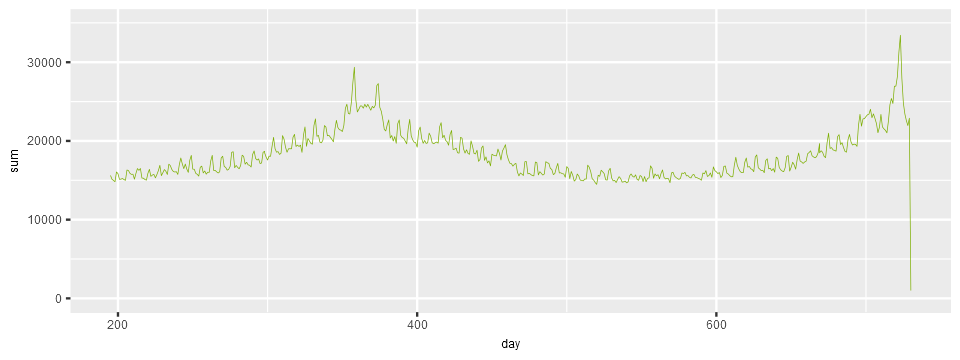

In [14]:
ggplot(data.day.based_on_48) +
geom_line(aes(x=day, y=sum), color=PALETTE[3]) +
ylim(0,35000)

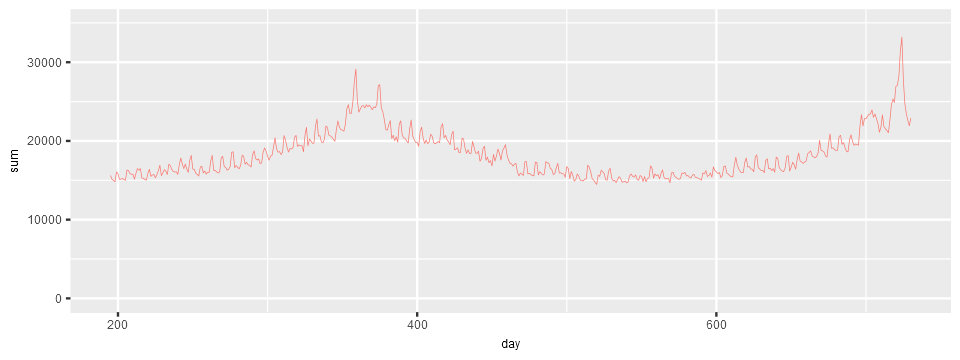

In [15]:
ggplot(data.day.based_on_label) +
geom_line(aes(x=day, y=sum), color=PALETTE[2]) +
ylim(0,35000)

<br>
Show the last few rows of the 2 new cross-tables.  Note, one of the tables ends with observations at time 47, the other at time 1.

In [16]:
tail(data.day.based_on_48)

timestamp day time sum       1002   1014   1018   1022  1027   1030  
25489 72547     725 47   24808.155  7.845 30.154 31.026 3.918 16.161 58.533
25537 72647     726 47   23434.471 10.208 31.531 40.729 4.039 14.075 33.017
25585 72747     727 47   22589.805  8.328 34.733 47.225 4.102 16.538  7.908
25633 72847     728 47   21950.877 14.121 25.899 43.081 4.060 17.044 29.052
25681 72947     729 47   22893.520 10.118 40.152 46.727 3.996 12.185 15.240
25729 73047     730 47     998.959  0.538  3.106  2.322 0.369  0.684  0.859
      1035    1036   1058   1059   1060   1073    1074   1076   1107   1119  
25489 186.243 38.265 59.799 42.672 22.764 108.221 83.878 18.267 49.117 45.823
25537 184.365 31.451 56.803 67.990 24.405  71.440 56.816 18.345 69.523 57.578
25585 188.178 34.377 27.408 25.130 25.852 100.239 45.919 17.443 26.469 59.781
25633 190.880 31.742 44.663 14.053 23.412  71.162 43.014 18.336 20.452 43.625
25681 192.835 53.198 57.047 17.358 21.159  99.466 54.786 17.716 23.064 31.286
25729  22.346  3.018  1.493  2.626  2.837   2.449  3.010  0.918  3.320  0.573
      1120  1130   1141   1144   1157   1164   1171    1212   1217   1225  
25489 2.213 38.188 54.789 31.755 62.579 65.830 123.730 64.070 54.752 36.820
25537 2.456 46.139 38.553 33.346 40.667 66.993  59.727 26.381 82.640 23.962
25585 2.589 38.340 49.754 49.923 53.806 66.980  83.648 29.560 48.417 20.976
25633 2.524 91.359 31.946 30.924 43.950 59.908  59.052 64.920 45.204 17.767
25681 2.542 72.958 25.795 29.139 32.603 63.807  77.057 42.155 44.177 18.137
25729 0.054  2.525  1.679  0.775  0.655  2.775   2.346  1.279  2.008  0.638
      1229   1239   1255   1257   1262  1274   1277   1281   1286   1301  
25489 40.394 17.664 21.920 14.930 0.112 37.820 22.335  9.565 34.092 11.331
25537 32.001 44.022 13.906 18.249 0.508 29.060  7.062 23.226 21.473 11.349
25585 42.408 39.891 36.391 14.443 0.773 41.084 20.850 18.062 29.989 12.873
25633 35.229 25.089 20.378 18.244 0.885 19.269  7.120 29.028 30.541  7.549
25681 30.313 34.022 21.380 18.536 0.591 31.919  2.392 15.442 21.855  0.000
25729  2.691  1.476  0.124  0.558 0.000  0.524  0.065  0.322  0.887  0.000
      1312   1316  1317   1331   1336   1364   1365   1371   1376   1388  
25489 68.230 0.609 14.923 16.423 87.102 34.938 37.548 25.605 37.842 21.488
25537 51.506 7.707 20.208 10.163 94.596 15.556 31.802 53.930 31.791 18.497
25585 16.382 5.250 28.278 25.495 71.505 18.086 16.374 32.223 51.503 23.140
25633  6.603 3.748 18.327 29.496 55.724 18.771 17.021 32.690 72.427 28.851
25681  6.246 6.167 21.766 35.081 67.017 18.638 12.882 51.024 70.263 19.143
25729  0.420 0.408  0.641  1.338  3.286  0.778  0.650  1.462  2.350  2.565
      1425   1428   1435   1440   1463   1480   1492   1494   1498   1502 
25489 62.246 32.668  8.838 18.908 49.867 15.264 15.364 41.252 33.491 3.869
25537 54.061 31.822  8.052 11.809 31.507 14.266  9.056 43.429 41.801 3.446
25585 58.244 33.075  8.388 11.820 27.579 12.532  4.612 53.848 40.660 2.578
25633 46.356 31.491 12.648  8.682 13.779 10.887  4.925 52.348 43.831 2.705
25681 63.974 40.224 10.185  3.592 19.575 16.788  8.833 54.670 42.794 2.707
25729  2.878  1.290  0.162  0.736  1.667  0.197  0.056  3.076  1.336 0.201
      1507   1517   1530   1532   1537   1539   1546   1548   1551   1561  
25489 15.142 27.688  3.781 40.770 35.793 22.726 57.224 42.209 13.542 42.475
25537 17.110 22.351 10.091 42.666 35.123 24.059 57.558 41.439 10.474 49.348
25585 12.461 25.960 16.454 37.568 32.967 20.399 65.787 42.089 11.152 39.367
25633 12.858 22.443 12.231 38.960 54.102 19.333 20.064 45.773 12.332 36.967
25681 12.339 18.737 13.597 42.796 38.877 17.104  4.815 37.478 14.734 31.249
25729  0.799  1.402  0.271  4.705  0.512  0.105  0.180  1.687  0.271  1.372
      1567   1573   1575   1592   1599   1607  1609   1624   1635   1639  
25489 24.211 76.088 55.304 25.629  7.225 5.383 22.267 23.728 18.559 16.595
25537 33.844 25.010 50.099 39.183 14.566 2.384 25.525 27.248 51.420 22.215
25585 16.854 43.459 49.221 44.187  9.192 0.652 21.855 34.928 25.

In [17]:
tail(data.day.based_on_label)

timestamp day time sum      1002   1014   1018   1022  1027   1030  
25443 72501     725 1    27723.53  1.853 15.291 29.022 3.713 10.902 18.311
25491 72601     726 1    24730.08  8.472 31.293 31.007 3.915 16.267 58.849
25539 72701     727 1    23428.85 10.303 31.445 41.663 4.071 14.301 34.755
25587 72801     728 1    22603.29  8.092 34.020 46.427 4.066 15.725  6.352
25635 72901     729 1    21939.43 14.106 27.888 43.093 4.075 17.068 29.804
25683 73001     730 1    22918.32 10.103 39.168 47.825 3.983 12.725 14.737
      1035    1036   1058    1059   1060   1073    1074    1076   1107   1119  
25443 190.064 52.586 102.572 41.104 36.261  92.154 128.310 18.890  8.904 60.532
25491 186.234 38.365  59.881 43.199 24.169 107.942  81.488 18.153 53.196 43.554
25539 186.108 31.582  56.969 67.235 24.131  69.791  56.208 18.333 66.753 58.967
25587 187.426 34.532  26.727 24.220 26.672 101.288  45.875 17.227 26.598 59.885
25635 191.250 31.135  45.317 14.061 21.044  70.164  43.288 18.644 19.960 42.838
25683 192.416 54.201  57.099 19.531 23.409 100.047  55.008 17.713 25.090 30.339
      1120  1130   1141   1144   1157   1164   1171    1212   1217   1225  
25443 1.944 69.634 61.164 70.119 47.174 69.683 220.997 74.777 52.614 38.902
25491 2.184 39.142 54.573 32.006 61.907 64.161 113.258 63.947 55.718 35.627
25539 2.467 47.909 38.145 34.038 40.531 69.098  55.548 24.188 85.733 24.228
25587 2.591 35.600 50.384 49.675 54.429 66.210  83.562 30.646 45.239 20.635
25635 2.520 94.042 32.056 30.946 42.337 61.297  59.032 68.667 44.407 17.666
25683 2.541 72.450 25.604 28.580 32.222 63.173  78.786 38.133 44.568 18.248
      1229   1239   1255   1257   1262  1274   1277   1281   1286   1301  
25443 49.914 24.714 33.904 10.402 0.000 53.076 15.091  9.155 35.608 11.414
25491 40.115 16.822 21.594 15.203 0.137 37.910 21.675  9.558 34.456 11.177
25539 31.771 45.024 14.196 18.341 0.502 29.606  7.399 26.052 20.766 11.397
25587 42.678 39.050 36.399 14.235 0.787 40.387 21.077 16.972 29.824 12.818
25635 34.851 25.217 20.338 18.243 0.892 19.296  6.477 28.555 31.069  7.165
25683 30.816 34.664 20.950 18.447 0.551 32.229  2.350 14.169 21.100  0.000
      1312   1316  1317   1331   1336   1364   1365   1371   1376   1388  
25443 72.231 0.000 28.612 13.486 88.235 64.780 36.280 46.455 37.918 10.012
25491 67.898 0.609 14.088 16.235 87.952 34.368 38.383 27.204 37.562 22.137
25539 49.798 8.146 20.430 10.118 93.972 15.567 32.070 52.490 31.838 17.787
25587 14.935 5.013 28.656 28.376 71.994 18.183 14.909 31.927 52.112 23.315
25635  6.357 3.762 18.340 27.546 58.576 18.966 16.646 32.242 72.084 29.016
25683  6.365 6.359 21.735 35.094 63.529 18.659 12.354 51.773 70.889 21.208
      1425   1428   1435   1440   1463   1480   1492   1494   1498   1502 
25443 54.559 47.677  9.736 10.802 38.587  7.106 19.453 49.209 59.293 2.181
25491 62.031 32.470  8.715 17.809 48.673 15.322 14.123 40.207 33.074 3.843
25539 54.485 32.997  8.051 12.848 31.524 14.210  9.173 43.258 41.812 3.576
25587 58.123 33.362  8.878 11.160 27.655 12.308  4.476 57.479 40.601 2.555
25635 46.164 30.264 12.342  8.569 13.619 11.244  4.951 48.891 44.196 2.652
25683 64.027 40.336  9.846  3.731 20.652 16.359  8.840 57.268 42.784 2.826
      1507   1517   1530   1532   1537   1539   1546   1548   1551   1561  
25443 24.881 29.742 15.043 42.495 39.310 30.095 66.160 60.333 23.042 46.459
25491 15.049 27.694  3.355 40.995 36.124 22.735 57.200 42.006  9.963 42.599
25539 16.481 22.355 10.597 44.486 34.944 27.542 57.848 40.663 10.736 49.268
25587 12.970 27.315 16.390 36.080 33.101 16.776 66.396 45.667 10.559 39.097
25635 11.676 21.090 12.288 38.426 54.827 19.345 17.091 42.789 12.447 36.786
25683 12.083 19.948 13.078 46.135 37.166 16.997  4.861 37.605 14.708 31.764
      1567   1573   1575   1592   1599   1607  1609   1624   1635   1639  
25443 24.947 89.685 54.311 30.764  7.204 7.021 36.356 27.145 12.284 23.410
25491 23.904 74.216 54.921 25.960  7.243 5.367 22.243 24.457 18.267 16.435
25539 35.647 25.998 50.385 39.555 14.819 2.183 25.614 26.

<br>
### Consider Daylight Savings Time Changes
___
Changes in daylight savings time may problematically offset electricity usage vs. time.

Show dimensions of the original data, number of unique `day` variable values, the earliest `day` variable value, the latest `day` variable value, the number of unique `time` variable values, the earliest `time` variable value, and the latest `time` variable value.  Note, the latest `time` variable value is greater than 48. 

In [18]:
dim(data)

length(unique(data$day))
min(data$day)
max(data$day)

length(unique(data$time))
min(data$time)
max(data$time)

[1] 25730   785

[1] 536

[1] 195

[1] 730

[1] 50

[1] 1

[1] 50

<br>
#### Look for daylight savings time change, fall back.

Show any rows where `time` variable value is greater than 48.

In [19]:
data.ok = data

In [20]:
i = which(data.ok$time > 48)
i
data.ok[i, ]

[1]  4993  4994 22801 22802

timestamp day time 1002  1014  1018  1022  1027  1030  1035  1036  1058 
4993  29849     298 49   0.137 0.237 0.417 0.089 0.029 0.283 0.102 0.060 0.147
4994  29850     298 50   0.054 0.222 0.439 0.110 0.072 0.279 0.028 0.039 0.112
22801 66949     669 49   0.079 0.292 0.590 0.097 0.067 0.229 7.591 0.442 0.116
22802 66950     669 50   0.021 1.660 0.601 0.066 0.037 0.221 6.591 0.481 0.117
      1059  1060  1073  1074  1076  1107  1119  1120  1130  1141  1144  1157 
4993  0.299 0.081 0.948 1.152 0.107 0.125 0.898 0.117 0.040 0.190 0.518 0.478
4994  0.662 0.004 0.465 1.141 0.203 0.126 0.248 0.140 0.068 0.126 0.466 0.349
22801 1.360 0.017 1.204 1.131 0.289 0.063 0.283 0.014 0.163 0.328 0.574 0.639
22802 1.393 0.020 0.400 1.142 0.256 0.063 0.334 0.039 0.078 0.174 0.457 0.613
      1164  1171  1212  1217  1225  1229  1239  1255  1257  1262  1274  1277 
4993  0.446 0.340 0.191 0.173 0.433 0.214 0.365 0.046 0.132 0.045 0.129 0.273
4994  0.466 0.289 0.190 0.118 0.371 0.227 0.229 0.107 0.126 0.045 0.154 0.289
22801 0.140 0.186 0.939 0.203 0.448 0.221 0.296 0.280 0.137 0.000 0.166 0.068
22802 0.109 0.118 0.168 0.206 0.425 0.225 0.270 0.224 0.107 0.000 0.165 0.028
      1281  1286  1301  1312  1316  1317  1331  1336  1364  1365  1371  1376 
4993  0.238 0.223 0.321 1.149 0.108 0.017 0.339 0.606 0.707 0.096 0.113 0.320
4994  0.143 0.506 0.512 1.156 0.000 0.096 0.276 1.603 0.390 0.161 0.142 0.260
22801 0.291 0.275 0.357 0.041 0.194 0.178 0.271 1.160 0.663 0.243 0.082 0.275
22802 0.168 0.242 0.226 0.041 0.077 0.032 0.228 2.567 0.450 0.216 0.091 0.267
      1388  1425  1428  1435  1440  1463  1480  1492  1494  1498  1502  1507 
4993  0.119 0.961 0.228 0.244 0.270 0.275 0.219 0.127 0.210 0.360 0.111 0.120
4994  0.047 0.488 0.445 0.238 0.206 0.315 0.128 0.017 0.202 0.371 0.112 0.092
22801 0.177 1.826 0.249 0.301 0.076 0.193 0.665 0.174 0.199 0.304 0.090 0.084
22802 0.219 0.789 0.332 0.276 0.039 0.246 0.214 0.070 0.126 0.250 0.016 0.122
      1517  1530  1532  1537  1539  1546  1548  1551  1561  1567  1573  1575 
4993  0.111 0.055 1.689 0.139 0.146 0.075 0.812 0.167 0.276 0.157 0.920 0.092
4994  0.116 0.165 1.019 0.084 0.138 0.090 0.708 0.156 0.178 0.134 1.390 0.052
22801 0.074 0.094 0.405 0.084 0.093 0.254 0.198 0.228 0.274 0.258 0.804 0.053
22802 0.111 0.111 0.296 0.144 0.127 0.467 0.182 0.275 0.279 0.248 0.906 0.036
      1592  1599  1607  1609  1624  1635  1639  1657  1660  1661  1664  1667 
4993  0.268 0.121 0.000 0.619 0.092 0.064 0.081 1.247 0.284 0.791 0.597 0.048
4994  0.167 0.124 0.006 0.574 0.071 0.096 0.118 0.134 0.366 0.724 0.614 0.044
22801 0.147 0.147 0.004 0.063 0.242 0.211 0.157 0.077 0.723 0.530 0.068 0.023
22802 0.117 0.100 0.041 0.080 0.391 0.184 0.097 0.077 0.812 0.509 0.058 0.024
      1670  1673  1679  1682  1695  1700  1711  1720  1722  1724  1727  1736 
4993  0.225 0.233 0.126 0.135 0.119 0.034 0.496 0.053 0.022 0.115 0.282 0.842
4994  0.255 0.114 0.068 0.100 0.046 0.015 0.650 0.086 0.022 0.100 0.240 0.565
22801 0.336 0.115 0.067 0.027 0.170 0.078 0.129 0.122 0.035 0.112 0.825 0.173
22802 0.507 0.103 0.067 0.025 0.671 0.106 0.149 0.162 0.036 0.106 1.117 0.154
      1742  1752  1754  1760  1763  1768  1797  1804  1807  1808  1809  1831 
4993  0.114 0.021 0.255 0.416 0.239 0.109 0.281 0.224 0.024 0.038 0.367 0.238
4994  0.190 0.052 0.236 0.316 0.227 0.276 0.173 0.130 0.042 0.107 0.366 0.276
22801 0.162 0.018 0.250 1.385 0.080 0.315 0.536 0.663 0.009 0.228 0.053 0.225
22802 0.137 0.019 0.257 1.255 0.086 0.337 0.375 1.786 0.009 0.096 0.103 0.207
      1840  1843  1844  1854  1859  1861  1874  1877  1883  1884  1885  1887 
4993  0.500 0.404 0.117 0.145 0.147 0.437 0.019 0.477 0.057 0.232 0.124 0.449
4994  0.120 0.519 0.116 0.088 0.059 0.500 0.086 0.448 0.057 0.288 0.103 0.309
22801 0.404 0.307 0.112 0.929 0.073 0.215 0.034 0.412 0.072 0.129 0.230 0.348
22802 0.343 0.221 0.112 0.451 0.060 0.131 0.014 0.395 0.019 0.121 0.285 0.141
      1890  1894  1905  1917  1922  1942  1948  1953  1964  1969  1984  1989 
4993  0.103 0.488 0.147

<br>
#### Remove "extraneous" observations.

Remove rows where `time` variable value is greater than 48.

In [21]:
data.ok = data.ok[-i,]
dim(data.ok)

[1] 25726   785

<br>
#### Look for daylight savings time change, spring ahead.

Show rows around any adjecent rows where `time` variable values are 1 and 4.  To find such rows, refer to them in a criterion with the rows on the right side of the "and" operator offset by one row with respect to the rows on the left side. 

In [22]:
j = which((data.ok$time == 1) & c((data.ok$time[-1] == 4), FALSE))
j
data.ok[(j-2):(j+2),]

[1] 12337

timestamp day time 1002  1014  1018  1022  1027  1030  1035   1036  1058 
12337 45147     451 47   0.544 0.362 0.409 0.196 0.062 2.674 11.785 0.365 0.942
12338 45148     451 48   0.379 0.215 0.389 0.137 0.079 1.137 11.531 0.182 0.877
12339 45201     452  1   0.082 0.289 0.407 0.133 0.023 1.108 11.106 0.125 0.610
12340 45204     452  4   0.035 0.222 0.399 0.149 0.071 0.529 10.255 0.167 0.227
12341 45205     452  5   0.056 0.273 0.444 0.112 0.043 0.744  9.917 0.033 0.221
      1059  1060  1073  1074  1076  1107  1119  1120  1130  1141  1144  1157 
12337 0.487 0.099 1.616 0.093 1.772 0.166 0.472 0.013 0.811 0.735 0.524 0.630
12338 0.336 0.107 0.863 0.072 0.132 0.200 0.258 0.032 0.724 0.306 0.314 1.459
12339 0.322 0.011 0.833 0.070 0.110 0.133 0.324 0.025 0.217 0.290 0.208 1.179
12340 0.324 0.014 0.782 0.070 0.104 0.135 0.229 0.013 0.309 0.308 0.240 0.685
12341 0.329 0.094 0.788 0.097 0.125 0.173 0.310 0.013 0.200 0.237 0.201 0.477
      1164  1171  1212  1217  1225  1229  1239  1255  1257  1262  1274  1277 
12337 0.400 0.443 0.534 0.579 0.324 0.828 0.532 0.106 0.152 0.034 0.201 0.132
12338 0.153 0.169 0.632 0.144 0.278 0.702 0.545 0.064 0.113 0.034 0.172 0.071
12339 0.117 0.237 0.328 0.139 0.329 0.366 0.489 0.109 0.157 0.011 0.163 0.087
12340 0.183 0.247 0.281 0.200 0.337 0.135 0.395 0.067 0.113 0.036 0.159 0.087
12341 0.130 0.273 0.267 0.114 0.265 0.266 0.377 0.078 0.152 0.011 0.161 0.058
      1281  1286  1301  1312  1316  1317  1331  1336  1364  1365  1371  1376 
12337 0.289 0.234 1.003 0.184 0.176 0.325 0.321 0.239 0.596 0.845 0.628 1.219
12338 0.322 0.233 1.294 0.040 0.174 0.317 0.326 0.209 0.648 1.173 0.621 0.120
12339 0.274 0.235 0.768 0.040 0.177 0.118 0.328 0.769 0.605 0.991 0.561 0.065
12340 0.219 0.205 0.521 0.080 0.190 0.181 0.408 0.944 0.673 0.876 0.576 0.115
12341 0.294 0.409 0.574 0.112 0.010 0.215 0.341 0.788 0.625 0.724 0.527 0.065
      1388  1425  1428  1435  1440  1463  1480  1492  1494  1498  1502  1507 
12337 0.187 1.091 0.478 0.266 0.307 0.231 0.486 0.013 0.148 0.330 0.216 0.143
12338 0.189 1.114 0.537 0.261 0.308 0.186 0.150 0.013 0.127 0.381 0.110 0.171
12339 0.188 1.080 0.454 0.326 0.257 0.158 0.149 0.079 0.124 0.375 0.120 0.218
12340 0.188 0.873 0.441 0.320 0.235 0.284 0.110 0.166 0.210 0.270 0.126 0.050
12341 0.186 1.234 0.276 0.319 0.216 0.177 0.134 0.088 0.092 0.400 0.126 0.009
      1517  1530  1532  1537  1539  1546  1548  1551  1561  1567  1573  1575 
12337 0.062 0.191 0.515 0.428 0.423 0.725 0.335 0.425 0.431 1.883 0.963 0.656
12338 0.149 0.212 0.587 0.567 0.402 0.553 0.228 0.306 0.351 0.231 0.818 0.577
12339 0.056 0.173 0.536 0.380 0.319 0.586 0.279 0.094 0.387 0.187 0.744 0.157
12340 0.134 0.137 0.445 0.285 0.295 0.645 0.228 0.095 0.455 0.301 0.751 0.059
12341 0.072 0.277 0.571 0.117 0.309 0.569 0.269 0.129 0.452 0.115 0.744 0.071
      1592  1599  1607  1609  1624  1635  1639  1657  1660  1661  1664  1667 
12337 0.467 0.130 0.008 0.564 0.176 0.230 0.481 0.478 1.163 0.951 0.674 0.105
12338 0.401 0.130 0.046 0.829 0.269 0.091 0.286 0.469 1.374 0.737 0.712 0.043
12339 0.208 0.123 0.008 0.482 0.171 0.119 0.214 0.271 0.942 0.284 0.643 0.074
12340 0.188 0.107 0.032 0.276 0.124 0.062 0.112 0.297 0.630 0.404 0.605 0.132
12341 0.179 0.127 0.022 0.103 0.172 0.133 0.110 0.088 0.634 0.397 0.338 0.114
      1670  1673  1679  1682  1695  1700  1711  1720  1722  1724  1727  1736 
12337 0.747 0.557 0.371 0.337 0.621 0.104 0.682 0.226 0.167 0.082 0.439 0.705
12338 0.709 1.638 0.188 0.336 0.461 0.108 0.812 0.109 0.172 0.100 0.280 0.548
12339 0.560 0.584 0.132 0.303 0.669 0.097 0.782 0.108 0.282 0.079 0.229 0.380
12340 0.468 0.200 0.083 0.229 0.322 0.092 0.512 0.108 0.274 0.060 0.506 0.101
12341 0.330 0.153 0.069 0.108 0.056 0.093 0.482 0.106 0.186 0.076 0.112 0.127
      1742  1752  1754  1760  1763  1768  1797  1804  1807  1808  1809  1831 
12337 0.283 0.042 1.096 1.534 0.693 0.350 0.491 0.799 0.413 0.326 0.067 0.224
12338 0.315 0.048 0.896 1.739 0.233 0.358 0.284 0.638 0.071 0.044 0.064 0.278
12339 0.285 0.02

<br>
#### Impute "missing" values.

Insert 2 new rows accordingly.  For each new row, calculate electricity usage values as $\frac{1}{3}$ of the way between the existing rows and $\frac{2}{3}$ of the way between the eisting rows, respectively.  Show the gap between the existing rows, the 2 new rows, and a few rows around the new rows.  

In [23]:
gap = data.ok[j, -(1:3)] - data.ok[j+1, -(1:3)] 
gap

1002  1014  1018  1022   1027   1030  1035  1036   1058  1059   1060  
12339 0.047 0.067 0.008 -0.016 -0.048 0.579 0.851 -0.042 0.383 -0.002 -0.003
      1073  1074 1076  1107   1119  1120  1130   1141   1144   1157  1164  
12339 0.051 0    0.006 -0.002 0.095 0.012 -0.092 -0.018 -0.032 0.494 -0.066
      1171  1212  1217   1225   1229  1239  1255  1257  1262   1274  1277 1281 
12339 -0.01 0.047 -0.061 -0.008 0.231 0.094 0.042 0.044 -0.025 0.004 0    0.055
      1286 1301  1312  1316   1317   1331  1336   1364   1365  1371   1376 
12339 0.03 0.247 -0.04 -0.013 -0.063 -0.08 -0.175 -0.068 0.115 -0.015 -0.05
      1388 1425  1428  1435  1440  1463   1480  1492   1494   1498  1502  
12339 0    0.207 0.013 0.006 0.022 -0.126 0.039 -0.087 -0.086 0.105 -0.006
      1507  1517   1530  1532  1537  1539  1546   1548  1551   1561   1567  
12339 0.168 -0.078 0.036 0.091 0.095 0.024 -0.059 0.051 -0.001 -0.068 -0.114
      1573   1575  1592 1599  1607   1609  1624  1635  1639  1657   1660  1661 
12339 -0.007 0.098 0.02 0.016 -0.024 0.206 0.047 0.057 0.102 -0.026 0.312 -0.12
      1664  1667   1670  1673  1679  1682  1695  1700  1711 1720 1722  1724 
12339 0.038 -0.058 0.092 0.384 0.049 0.074 0.347 0.005 0.27 0    0.008 0.019
      1727   1736  1742   1752   1754   1760   1763  1768  1797  1804   1807 
12339 -0.277 0.279 -0.003 -0.005 -0.011 -0.031 0.059 0.233 -0.03 -0.111 0.032
      1808 1809  1831   1840  1843  1844   1854  1859  1861  1874 1877  1883  
12339 0    0.052 -0.025 0.072 0.151 -0.016 0.567 0.088 0.006 0.08 0.013 -0.078
      1884  1885   1887   1890  1894   1905  1917  1922   1942   1948  1953 
12339 0.023 -0.088 -0.017 0.312 -0.038 0.076 0.382 -0.033 -0.245 0.016 0.017
      1964  1969   1984   1989   2018   2022   2023  2029  2036   2041  2046  
12339 0.011 -0.018 -0.064 -0.091 -0.049 -0.006 0.047 0.002 -0.052 0.208 -0.138
      2049 2055 2065  2080  2099  2103  2104  2105  2106 2109  2110   2121 
12339 0.01 0    0.012 0.102 0.013 0.035 0.138 0.169 0    0.392 -0.419 0.056
      2140  2144  2149   2160 2185  2194  2196   2231   2235  2238  2259  2260 
12339 0.063 0.315 -0.003 0.13 0.003 0.001 -0.001 -0.043 0.017 0.281 0.059 -0.06
      2264   2265  2268   2289   2312  2314   2331  2345  2347  2349   2354 
12339 -0.031 0.124 -0.031 -0.048 0.103 -0.038 0.111 0.127 0.116 -0.049 0.084
      2370  2377  2387   2404  2405  2406 2407   2409   2423  2424 2436  
12339 0.131 0.099 -0.001 0.177 0.038 0.07 -0.001 -0.005 0.019 0    -0.048
      2438   2463  2485   2490  2512 2519  2522  2526   2529 2532  2541  2547 
12339 -0.101 0.052 -0.012 0.018 0    0.112 0.957 -0.134 0    0.008 0.039 0.048
      2553   2562   2574  2594   2607   2621  2623   2635   2638  2640 2669  
12339 -0.011 -0.008 0.072 -0.001 -0.041 0.088 -0.015 -0.001 0.093 0.01 -0.004
      2678  2684   2698  2707  2708   2710   2725   2730   2732  2733   2742 
12339 0.067 -0.048 0.024 0.066 -0.026 -0.041 -0.031 -0.062 0.471 -0.017 0.012
      2749   2757   2774  2789  2793 2803   2811 2832  2834  2838 2857  2873  
12339 -0.124 -0.086 0.039 0.308 0    -0.022 0.62 0.138 0.069 0.16 0.035 -0.058
      2878  2892  2905 2918  2926  2945  2956  2967  2968  2971  2987  2988 
12339 0.036 0.208 0.08 -0.06 0.058 0.018 0.062 0.032 0.054 0.568 0.002 0.051
      3003  3009   3010  3019   3043  3050   3052  3055  3059   3061  3077  
12339 0.066 -0.045 0.063 -0.015 0.091 -0.057 0.032 -0.01 -0.071 0.076 -0.061
      3080 3091   3098  3105   3110 3111  3120 3124  3152   3165   3168  3177 
12339 0.22 -0.041 0.338 -0.165 0.21 0.039 0    0.225 -0.068 -0.109 0.669 0.029
      3178  3180   3184   3211  3217   3221   3234  3245 3246   3262   3281 
12339 -0.01 -0.051 -0.059 0.024 -0.002 -0.015 0.002 0    -0.009 -0.184 0.018
      3293  3302 3306  3314   3326  3335  3337  3346 3355  3358  3367   3387 
12339 0.118 0    0.001 -0.015 0.078 0.019 0.065 0.01 0.006 0.006 -0.053 0.797
      3393   3397   3403  3443  3444  3445 3453   3458 3465  3474  3495  3496  
12339 -0.009 -0.027 -0.32 0.174 -0.07 0.02 -0.

In [24]:
j2 = cbind(data.ok[j, 1:2], data.frame(time=2), data.ok[j, -(1:3)] - (1/3)*gap)
j2

j3 = cbind(data.ok[j, 1:2], data.frame(time=3), data.ok[j, -(1:3)] - (2/3)*gap)
j3        

timestamp day time 1002       1014      1018      1022      1027  1030 
12339 45201     452 2    0.06633333 0.2666667 0.4043333 0.1383333 0.039 0.915
      1035     1036  1058      1059      1060  1073  1074 1076  1107     
12339 10.82233 0.139 0.4823333 0.3226667 0.012 0.816 0.07 0.108 0.1336667
      1119      1120  1130      1141  1144      1157     1164  1171     
12339 0.2923333 0.021 0.2476667 0.296 0.2186667 1.014333 0.139 0.2403333
      1212      1217      1225      1229  1239      1255  1257      1262      
12339 0.3123333 0.1593333 0.3316667 0.289 0.4576667 0.095 0.1423333 0.01933333
      1274      1277  1281      1286  1301      1312       1316      1317 
12339 0.1616667 0.087 0.2556667 0.225 0.6856667 0.05333333 0.1813333 0.139
      1331      1336      1364      1365      1371  1376       1388  1425 
12339 0.3546667 0.8273333 0.6276667 0.9526667 0.566 0.08166667 0.188 1.011
      1428      1435  1440      1463 1480  1492  1494      1498 1502  1507 
12339 0.4496667 0.324 0.2496667 0.2  0.136 0.108 0.1526667 0.34 0.122 0.162
      1517  1530  1532      1537      1539  1546      1548  1551      
12339 0.082 0.161 0.5056667 0.3483333 0.311 0.6056667 0.262 0.09433333
      1561      1567  1573      1575      1592      1599      1607  1609     
12339 0.4096667 0.225 0.7463333 0.1243333 0.2013333 0.1176667 0.016 0.4133333
      1624      1635 1639 1657      1660  1661  1664      1667       1670     
12339 0.1553333 0.1  0.18 0.2796667 0.838 0.324 0.6303333 0.09333333 0.5293333
      1673  1679      1682      1695      1700       1711  1720  1722     
12339 0.456 0.1156667 0.2783333 0.5533333 0.09533333 0.692 0.108 0.2793333
      1724       1727      1736  1742  1752       1754      1760     1763     
12339 0.07266667 0.3213333 0.287 0.286 0.02166667 0.2606667 1.015333 0.1603333
      1768      1797  1804 1807       1808  1809       1831      1840 
12339 0.4323333 0.143 0.69 0.03133333 0.011 0.08266667 0.2403333 0.421
      1843      1844      1854  1859       1861  1874       1877      1883 
12339 0.2936667 0.1073333 1.345 0.08166667 0.227 0.09333333 0.5046667 0.043
      1884      1885      1887      1890  1894      1905       1917      1922
12339 0.3623333 0.2623333 0.3046667 1.174 0.1496667 0.09866667 0.4096667 0.08
      1942     1948       1953       1964      1969  1984      1989     
12339 1.318667 0.06166667 0.03933333 0.2033333 0.428 0.3463333 0.2513333
      2018       2022  2023      2029      2036      2041      2046  2049     
12339 0.08233333 0.478 0.1713333 0.1433333 0.2903333 0.3856667 0.873 0.1086667
      2055 2065 2080  2099      2103      2104  2105      2106  2109     
12339 0    0.09 0.167 0.2786667 0.3873333 0.568 0.1836667 0.015 0.6563333
      2110      2121      2140  2144  2149  2160      2185  2194      
12339 0.2276667 0.2523333 0.468 0.475 0.056 0.2766667 0.229 0.02066667
      2196      2231      2235      2238     2259       2260 2264     
12339 0.1293333 0.2693333 0.1173333 1.298333 0.05733333 0.05 0.9453333
      2265      2268      2289  2312      2314      2331  2345      2347     
12339 0.1556667 0.6753333 0.036 0.1736667 0.4346667 0.405 0.2546667 0.4243333
      2349      2354  2370      2377  2387      2404  2405       2406     
12339 0.4433333 0.102 0.1883333 0.385 0.1853333 0.534 0.08833333 0.2466667
      2407       2409       2423      2424  2436 2438      2463      2485  2490
12339 0.05733333 0.04966667 0.1426667 0.098 0.1  0.1116667 0.2846667 0.252 0.19
      2512  2519      2522  2526      2529  2532      2541  2547  2553     
12339 0.026 0.2436667 0.809 0.3566667 0.217 0.2173333 0.137 0.095 0.2406667
      2562      2574  2594      2607       2621      2623  2635      2638 
12339 0.1366667 0.179 0.1353333 0.07666667 0.1546667 0.115 0.2583333 0.233
      2640      2669      2678      2684  2698  2707  2708       2710     
12339 0.9926667 0.1273333 0.1036667 0.253 0.355 0.119 0.05966667 0.1016667
      2725      2730      2732  2733      2742 2749      2757      2774 
12339

timestamp day time 1002       1014      1018      1022      1027  1030 
12339 45201     452 3    0.05066667 0.2443333 0.4016667 0.1436667 0.055 0.722
      1035     1036  1058      1059      1060  1073  1074 1076  1107     
12339 10.53867 0.153 0.3546667 0.3233333 0.013 0.799 0.07 0.106 0.1343333
      1119      1120  1130      1141  1144      1157      1164  1171     
12339 0.2606667 0.017 0.2783333 0.302 0.2293333 0.8496667 0.161 0.2436667
      1212      1217      1225      1229  1239      1255  1257      1262      
12339 0.2966667 0.1796667 0.3343333 0.212 0.4263333 0.081 0.1276667 0.02766667
      1274      1277  1281      1286  1301      1312       1316      1317
12339 0.1603333 0.087 0.2373333 0.215 0.6033333 0.06666667 0.1856667 0.16
      1331      1336      1364      1365      1371  1376       1388  1425 
12339 0.3813333 0.8856667 0.6503333 0.9143333 0.571 0.09833333 0.188 0.942
      1428      1435  1440      1463  1480  1492  1494      1498  1502  1507 
12339 0.4453333 0.322 0.2423333 0.242 0.123 0.137 0.1813333 0.305 0.124 0.106
      1517  1530  1532      1537      1539  1546      1548  1551      
12339 0.108 0.149 0.4753333 0.3166667 0.303 0.6253333 0.245 0.09466667
      1561      1567  1573      1575       1592      1599      1607  1609     
12339 0.4323333 0.263 0.7486667 0.09166667 0.1946667 0.1123333 0.024 0.3446667
      1624      1635  1639  1657      1660  1661  1664      1667      1670     
12339 0.1396667 0.081 0.146 0.2883333 0.734 0.364 0.6176667 0.1126667 0.4986667
      1673  1679       1682      1695      1700       1711  1720  1722     
12339 0.328 0.09933333 0.2536667 0.4376667 0.09366667 0.602 0.108 0.2766667
      1724       1727      1736  1742  1752       1754      1760     1763     
12339 0.06633333 0.4136667 0.194 0.287 0.02333333 0.2643333 1.025667 0.1406667
      1768      1797  1804  1807       1808  1809       1831      1840 
12339 0.3546667 0.153 0.727 0.02066667 0.011 0.06533333 0.2486667 0.397
      1843      1844      1854  1859       1861  1874       1877      1883 
12339 0.2433333 0.1126667 1.156 0.05233333 0.225 0.06666667 0.5003333 0.069
      1884      1885      1887      1890 1894      1905       1917      1922 
12339 0.3546667 0.2916667 0.3103333 1.07 0.1623333 0.07333333 0.2823333 0.091
      1942     1948       1953       1964      1969  1984      1989     
12339 1.400333 0.05633333 0.03366667 0.1996667 0.434 0.3676667 0.2816667
      2018       2022 2023      2029      2036      2041      2046  2049     
12339 0.09866667 0.48 0.1556667 0.1426667 0.3076667 0.3163333 0.919 0.1053333
      2055 2065  2080  2099      2103      2104  2105      2106  2109     
12339 0    0.086 0.133 0.2743333 0.3756667 0.522 0.1273333 0.015 0.5256667
      2110      2121      2140  2144 2149  2160      2185  2194       2196     
12339 0.3673333 0.2336667 0.447 0.37 0.057 0.2333333 0.228 0.02033333 0.1296667
      2231      2235      2238     2259       2260 2264      2265     
12339 0.2836667 0.1116667 1.204667 0.03766667 0.07 0.9556667 0.1143333
      2268      2289  2312      2314      2331  2345      2347      2349     
12339 0.6856667 0.052 0.1393333 0.4473333 0.368 0.2123333 0.3856667 0.4596667
      2354  2370      2377  2387      2404  2405       2406      2407      
12339 0.074 0.1446667 0.352 0.1856667 0.475 0.07566667 0.2233333 0.05766667
      2409       2423      2424  2436  2438      2463      2485  2490  2512 
12339 0.05133333 0.1363333 0.098 0.116 0.1453333 0.2673333 0.256 0.184 0.026
      2519      2522 2526      2529  2532      2541  2547  2553      2562     
12339 0.2063333 0.49 0.4013333 0.217 0.2146667 0.124 0.079 0.2443333 0.1393333
      2574  2594      2607       2621      2623 2635      2638  2640     
12339 0.155 0.1356667 0.09033333 0.1253333 0.12 0.2586667 0.202 0.9893333
      2669      2678       2684  2698  2707  2708       2710      2725     
12339 0.1286667 0.08133333 0.269 0.347 0.097 0.06833333 0.1153333 0.2596667
      2730      2732  2733      2742  2749    

In [25]:
data.ok = rbind(data.ok[1:j,], j2, j3, data.ok[(j+1):nrow(data.ok),])
data.ok[(j-2):(j+4),]

timestamp day time 1002       1014      1018      1022      1027  1030 
12337  45147     451 47   0.54400000 0.3620000 0.4090000 0.1960000 0.062 2.674
12338  45148     451 48   0.37900000 0.2150000 0.3890000 0.1370000 0.079 1.137
12339  45201     452  1   0.08200000 0.2890000 0.4070000 0.1330000 0.023 1.108
123391 45201     452  2   0.06633333 0.2666667 0.4043333 0.1383333 0.039 0.915
123392 45201     452  3   0.05066667 0.2443333 0.4016667 0.1436667 0.055 0.722
12340  45204     452  4   0.03500000 0.2220000 0.3990000 0.1490000 0.071 0.529
12341  45205     452  5   0.05600000 0.2730000 0.4440000 0.1120000 0.043 0.744
       1035     1036  1058      1059      1060  1073  1074  1076  1107     
12337  11.78500 0.365 0.9420000 0.4870000 0.099 1.616 0.093 1.772 0.1660000
12338  11.53100 0.182 0.8770000 0.3360000 0.107 0.863 0.072 0.132 0.2000000
12339  11.10600 0.125 0.6100000 0.3220000 0.011 0.833 0.070 0.110 0.1330000
123391 10.82233 0.139 0.4823333 0.3226667 0.012 0.816 0.070 0.108 0.1336667
123392 10.53867 0.153 0.3546667 0.3233333 0.013 0.799 0.070 0.106 0.1343333
12340  10.25500 0.167 0.2270000 0.3240000 0.014 0.782 0.070 0.104 0.1350000
12341   9.91700 0.033 0.2210000 0.3290000 0.094 0.788 0.097 0.125 0.1730000
       1119      1120  1130      1141  1144      1157      1164  1171     
12337  0.4720000 0.013 0.8110000 0.735 0.5240000 0.6300000 0.400 0.4430000
12338  0.2580000 0.032 0.7240000 0.306 0.3140000 1.4590000 0.153 0.1690000
12339  0.3240000 0.025 0.2170000 0.290 0.2080000 1.1790000 0.117 0.2370000
123391 0.2923333 0.021 0.2476667 0.296 0.2186667 1.0143333 0.139 0.2403333
123392 0.2606667 0.017 0.2783333 0.302 0.2293333 0.8496667 0.161 0.2436667
12340  0.2290000 0.013 0.3090000 0.308 0.2400000 0.6850000 0.183 0.2470000
12341  0.3100000 0.013 0.2000000 0.237 0.2010000 0.4770000 0.130 0.2730000
       1212      1217      1225      1229  1239      1255  1257      1262      
12337  0.5340000 0.5790000 0.3240000 0.828 0.5320000 0.106 0.1520000 0.03400000
12338  0.6320000 0.1440000 0.2780000 0.702 0.5450000 0.064 0.1130000 0.03400000
12339  0.3280000 0.1390000 0.3290000 0.366 0.4890000 0.109 0.1570000 0.01100000
123391 0.3123333 0.1593333 0.3316667 0.289 0.4576667 0.095 0.1423333 0.01933333
123392 0.2966667 0.1796667 0.3343333 0.212 0.4263333 0.081 0.1276667 0.02766667
12340  0.2810000 0.2000000 0.3370000 0.135 0.3950000 0.067 0.1130000 0.03600000
12341  0.2670000 0.1140000 0.2650000 0.266 0.3770000 0.078 0.1520000 0.01100000
       1274      1277  1281      1286  1301      1312       1316      1317 
12337  0.2010000 0.132 0.2890000 0.234 1.0030000 0.18400000 0.1760000 0.325
12338  0.1720000 0.071 0.3220000 0.233 1.2940000 0.04000000 0.1740000 0.317
12339  0.1630000 0.087 0.2740000 0.235 0.7680000 0.04000000 0.1770000 0.118
123391 0.1616667 0.087 0.2556667 0.225 0.6856667 0.05333333 0.1813333 0.139
123392 0.1603333 0.087 0.2373333 0.215 0.6033333 0.06666667 0.1856667 0.160
12340  0.1590000 0.087 0.2190000 0.205 0.5210000 0.08000000 0.1900000 0.181
12341  0.1610000 0.058 0.2940000 0.409 0.5740000 0.11200000 0.0100000 0.215
       1331      1336      1364      1365      1371  1376       1388  1425 
12337  0.3210000 0.2390000 0.5960000 0.8450000 0.628 1.21900000 0.187 1.091
12338  0.3260000 0.2090000 0.6480000 1.1730000 0.621 0.12000000 0.189 1.114
12339  0.3280000 0.7690000 0.6050000 0.9910000 0.561 0.06500000 0.188 1.080
123391 0.3546667 0.8273333 0.6276667 0.9526667 0.566 0.08166667 0.188 1.011
123392 0.3813333 0.8856667 0.6503333 0.9143333 0.571 0.09833333 0.188 0.942
12340  0.4080000 0.9440000 0.6730000 0.8760000 0.576 0.11500000 0.188 0.873
12341  0.3410000 0.7880000 0.6250000 0.7240000 0.527 0.06500000 0.186 1.234
       1428      1435  1440      1463  1480  1492  1494      1498  1502  1507 
12337  0.4780000 0.266 0.3070000 0.231 0.486 0.013 0.1480000 0.330 0.216 0.143
12338  0.5370000 0.261 0.3080000 0.186 0.150 0.013 0.1270000 0.381 0.110 0.171
12339  0.4540000 0.326 0.2570000 0.158 0.149 0.079 0.1240000 0.375 0.120 0

<br>
#### Reform dataset adjusted for daylight savings time changes to daily resolution.

Construct a grouping vector that can be used to organize observations into 48 half-hour groups.  The vector comprises 48 1's, followed by 48 2's, followed by 48 3's, etc.  Reform the data to daily resolution, based on the grouping vector - for each 48 half-hour period, aggregate row values by group within each column.    

In [26]:
group.ok = make_group_labels(data.ok, 48)
head(group.ok, 135)

i = seq(1, length(group.ok), 48)

data.ok.day.ID = data.ok[i, 1:3]
head(data.ok.day.ID)

data.ok.day.value = rowsum(data.ok[,-(1:3)], group=group.ok)
head(data.ok.day.value)

data.ok.day = cbind(data.ok.day.ID, data.ok.day.value)
dim(data.ok.day)
head(data.ok.day)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

timestamp day time
1   19501     195 1   
49  19601     196 1   
97  19701     197 1   
145 19801     198 1   
193 19901     199 1   
241 20001     200 1

1002   1014   1018   1022   1027  1030   1035   1036   1058   1059   1060  
1  6.355 34.085 50.537 18.392 6.592 18.871  7.619  8.634 13.358 34.338  4.919
2  8.972 32.544 52.621 17.287 5.640 14.638 14.728  8.433 16.258 15.915  4.030
3  8.794 31.324 42.536 14.899 8.619 10.801  9.150  9.763 17.992 23.650 11.290
4  8.306 36.053 44.322 17.034 7.374  5.186  9.895  9.299 14.250 35.466  5.190
5 10.119 37.845 37.231 23.125 6.716 16.435  5.309 12.640 19.544 44.161  4.126
6  7.838 32.839 36.839  7.743 6.482 12.781  5.032 12.406 18.674 37.874  9.179
  1073   1074   1076   1107   1119   1120  1130   1141   1144   1157   1164  
1 43.316 12.115 20.806  4.362 33.677 4.086 34.353 37.462 24.987 33.609 31.563
2 49.737  7.870 17.831 21.510 43.081 8.588 22.908 38.236 40.683 26.135 29.307
3 38.484  6.230 20.691 16.940 41.726 1.556 35.926 38.398 16.729 20.224 24.884
4 42.226 14.935 14.565 18.380 35.285 2.129 19.793 28.100 15.347 25.248 25.224
5 57.909  6.966 28.657 22.020 76.450 5.111 40.331 47.599 18.386 36.665 31.516
6 37.855  5.929 20.040 25.431 53.860 3.519 37.422 42.102 35.423 25.177 61.355
  1171   1212   1217   1225   1229   1239   1255   1257   1262   1274   1277  
1 46.358 16.779 42.244 19.164 22.931 16.255 14.781 13.627  9.312 21.634 25.040
2 32.012 22.185 51.389 18.230 27.335 17.523 15.991 14.228 20.724 11.060  7.990
3 34.797 19.503 45.887 16.291 31.060 18.309  9.063 14.375  8.065 18.014  9.012
4 62.374 23.136 37.476 14.607 36.266 26.141 16.258 17.260  6.101 25.912  0.334
5 57.670 27.263 25.049 16.192 55.797 31.667 14.609 15.820  7.087 15.449  0.386
6 45.489 18.328 21.450 12.181 46.209 22.266 15.252 16.112  8.616 11.668  0.351
  1281   1286   1301   1312  1316  1317   1331   1336   1364   1365   1371  
1 32.926 16.417 10.815 3.238 4.996 19.669 16.702 19.221 12.436  7.289 39.310
2 26.059 17.079 22.254 2.940 6.600 28.950 15.633 28.496 14.221  8.870 16.595
3 24.545 16.693 25.938 3.017 5.789 21.875 15.173 17.787 11.497  8.143 51.062
4 60.076 16.476 23.396 3.115 6.705 19.740 16.574 20.208  8.368 11.263 38.766
5 29.294 22.602 21.826 2.967 4.025 19.130 11.565 38.175 17.656 16.710 20.846
6 32.608 12.884 23.821 2.740 1.905 19.155 19.053 35.007 11.960 22.935 25.207
  1376   1388  1425   1428   1435   1440   1463   1480  1492  1494   1498  
1 17.289 5.840 11.149  9.939 11.288 10.857 23.701 3.534 3.306 43.600 42.554
2 46.553 5.468 10.998  9.996  7.151 11.846 32.385 3.535 3.766 49.806 35.753
3 45.312 5.264 10.505 12.684  6.856  8.165 21.352 3.544 6.095 44.657 25.703
4 50.120 5.794 10.626 17.398  6.962 11.429 21.923 3.577 2.889 41.923 17.012
5 59.638 7.132 10.866 29.884 10.953 10.287 14.805 3.578 6.504 46.209 30.858
6 39.263 6.477 30.866 22.417  9.715  9.343 12.821 3.569 6.320 26.498 23.610
  1502   1507  1517   1530   1532   1537   1539   1546  1548   1551   1561  
1 19.657 6.431 19.492  9.495 40.657 24.557 32.934 4.101 29.502 13.519 43.005
2 18.752 6.246 14.238 10.438 27.117 12.706 40.610 4.356 19.698 10.196 23.209
3 19.110 6.175 22.609 10.430 31.648 23.535 35.197 4.386 20.800 17.424 23.639
4 15.293 6.108 20.314  8.192 32.249 17.194 38.160 3.813 24.658 12.131 28.317
5 20.204 6.284 19.091  8.265 32.758 23.185 35.919 3.666 39.613 11.337 28.026
6 12.293 6.726 18.233  8.244 34.273 25.748 38.823 4.147 33.218 10.657 31.046
  1567   1573   1575   1592   1599   1607  1609   1624   1635   1639   1657  
1 22.482 37.466 21.404 26.359 17.281 1.351 15.447 17.206 25.704 11.367  2.602
2 22.645 41.410 18.086 18.325 13.901 1.362 12.096 20.108 30.844  9.795  2.623
3 18.021 23.927 21.093 12.501 12.011 1.560 19.709 30.495 35.108 17.587  4.893
4 24.549 24.593 30.760 10.766 10.559 1.641 16.324 16.432 33.109 13.023 14.132
5 18.230 20.458 27.240 16.113 10.604 2.616 22.324 27.496 37.830 12.149  4.233
6 20.396 47.113 34.681  9.504  8.137 1.376 20.233 17.765 31.657 13.024  1.300
  1660   1661   1664   1667   1670   1673   1679   1682  1695   1700  1711 
1 29.235 59.870 10.526 13.857 23.617 29.550 16.918 4.257 14.758 4.064 2.842
2 35.129 26.017  9.841  7.978 11.827 22.891 13.75

[1] 536 785

timestamp day time 1002   1014   1018   1022   1027  1030   1035   1036  
1   19501     195 1     6.355 34.085 50.537 18.392 6.592 18.871  7.619  8.634
49  19601     196 1     8.972 32.544 52.621 17.287 5.640 14.638 14.728  8.433
97  19701     197 1     8.794 31.324 42.536 14.899 8.619 10.801  9.150  9.763
145 19801     198 1     8.306 36.053 44.322 17.034 7.374  5.186  9.895  9.299
193 19901     199 1    10.119 37.845 37.231 23.125 6.716 16.435  5.309 12.640
241 20001     200 1     7.838 32.839 36.839  7.743 6.482 12.781  5.032 12.406
    1058   1059   1060   1073   1074   1076   1107   1119   1120  1130   1141  
1   13.358 34.338  4.919 43.316 12.115 20.806  4.362 33.677 4.086 34.353 37.462
49  16.258 15.915  4.030 49.737  7.870 17.831 21.510 43.081 8.588 22.908 38.236
97  17.992 23.650 11.290 38.484  6.230 20.691 16.940 41.726 1.556 35.926 38.398
145 14.250 35.466  5.190 42.226 14.935 14.565 18.380 35.285 2.129 19.793 28.100
193 19.544 44.161  4.126 57.909  6.966 28.657 22.020 76.450 5.111 40.331 47.599
241 18.674 37.874  9.179 37.855  5.929 20.040 25.431 53.860 3.519 37.422 42.102
    1144   1157   1164   1171   1212   1217   1225   1229   1239   1255  
1   24.987 33.609 31.563 46.358 16.779 42.244 19.164 22.931 16.255 14.781
49  40.683 26.135 29.307 32.012 22.185 51.389 18.230 27.335 17.523 15.991
97  16.729 20.224 24.884 34.797 19.503 45.887 16.291 31.060 18.309  9.063
145 15.347 25.248 25.224 62.374 23.136 37.476 14.607 36.266 26.141 16.258
193 18.386 36.665 31.516 57.670 27.263 25.049 16.192 55.797 31.667 14.609
241 35.423 25.177 61.355 45.489 18.328 21.450 12.181 46.209 22.266 15.252
    1257   1262   1274   1277   1281   1286   1301   1312  1316  1317   1331  
1   13.627  9.312 21.634 25.040 32.926 16.417 10.815 3.238 4.996 19.669 16.702
49  14.228 20.724 11.060  7.990 26.059 17.079 22.254 2.940 6.600 28.950 15.633
97  14.375  8.065 18.014  9.012 24.545 16.693 25.938 3.017 5.789 21.875 15.173
145 17.260  6.101 25.912  0.334 60.076 16.476 23.396 3.115 6.705 19.740 16.574
193 15.820  7.087 15.449  0.386 29.294 22.602 21.826 2.967 4.025 19.130 11.565
241 16.112  8.616 11.668  0.351 32.608 12.884 23.821 2.740 1.905 19.155 19.053
    1336   1364   1365   1371   1376   1388  1425   1428   1435   1440   1463  
1   19.221 12.436  7.289 39.310 17.289 5.840 11.149  9.939 11.288 10.857 23.701
49  28.496 14.221  8.870 16.595 46.553 5.468 10.998  9.996  7.151 11.846 32.385
97  17.787 11.497  8.143 51.062 45.312 5.264 10.505 12.684  6.856  8.165 21.352
145 20.208  8.368 11.263 38.766 50.120 5.794 10.626 17.398  6.962 11.429 21.923
193 38.175 17.656 16.710 20.846 59.638 7.132 10.866 29.884 10.953 10.287 14.805
241 35.007 11.960 22.935 25.207 39.263 6.477 30.866 22.417  9.715  9.343 12.821
    1480  1492  1494   1498   1502   1507  1517   1530   1532   1537   1539  
1   3.534 3.306 43.600 42.554 19.657 6.431 19.492  9.495 40.657 24.557 32.934
49  3.535 3.766 49.806 35.753 18.752 6.246 14.238 10.438 27.117 12.706 40.610
97  3.544 6.095 44.657 25.703 19.110 6.175 22.609 10.430 31.648 23.535 35.197
145 3.577 2.889 41.923 17.012 15.293 6.108 20.314  8.192 32.249 17.194 38.160
193 3.578 6.504 46.209 30.858 20.204 6.284 19.091  8.265 32.758 23.185 35.919
241 3.569 6.320 26.498 23.610 12.293 6.726 18.233  8.244 34.273 25.748 38.823
    1546  1548   1551   1561   1567   1573   1575   1592   1599   1607  1609  
1   4.101 29.502 13.519 43.005 22.482 37.466 21.404 26.359 17.281 1.351 15.447
49  4.356 19.698 10.196 23.209 22.645 41.410 18.086 18.325 13.901 1.362 12.096
97  4.386 20.800 17.424 23.639 18.021 23.927 21.093 12.501 12.011 1.560 19.709
145 3.813 24.658 12.131 28.317 24.549 24.593 30.760 10.766 10.559 1.641 16.324
193 3.666 39.613 11.337 28.026 18.230 20.458 27.240 16.113 10.604 2.616 22.324
241 4.147 33.218 10.657 31.046 20.396 47.113 34.681  9.504  8.137 1.376 20.233
    1624   1635   1639   1657   1660   1661   1664   1667   1670   1673  
1   17.206 25.704 11.367  2.602 29.235 59.870 10.526 13.857 23.617 29.550
49  20.108 30.844  9

<br>
Add a column to the cross-table for aggregate electricity usage.  Position this new column 4th.  Show the dimensions and first few rows and last few rows of the resulting cross-table. 

In [27]:
data.ok.day$sum = rowSums(data.ok.day[, -(1:3)])
data.ok.day = move_column(data.ok.day, "sum", 4)
dim(data.ok.day)
head(data.ok.day)
tail(data.ok.day)

[1] 536 786

timestamp day time sum      1002   1014   1018   1022   1027  1030   1035  
1   19501     195 1    15625.20  6.355 34.085 50.537 18.392 6.592 18.871  7.619
49  19601     196 1    15134.51  8.972 32.544 52.621 17.287 5.640 14.638 14.728
97  19701     197 1    14992.90  8.794 31.324 42.536 14.899 8.619 10.801  9.150
145 19801     198 1    14820.22  8.306 36.053 44.322 17.034 7.374  5.186  9.895
193 19901     199 1    16069.83 10.119 37.845 37.231 23.125 6.716 16.435  5.309
241 20001     200 1    15843.58  7.838 32.839 36.839  7.743 6.482 12.781  5.032
    1036   1058   1059   1060   1073   1074   1076   1107   1119   1120  1130  
1    8.634 13.358 34.338  4.919 43.316 12.115 20.806  4.362 33.677 4.086 34.353
49   8.433 16.258 15.915  4.030 49.737  7.870 17.831 21.510 43.081 8.588 22.908
97   9.763 17.992 23.650 11.290 38.484  6.230 20.691 16.940 41.726 1.556 35.926
145  9.299 14.250 35.466  5.190 42.226 14.935 14.565 18.380 35.285 2.129 19.793
193 12.640 19.544 44.161  4.126 57.909  6.966 28.657 22.020 76.450 5.111 40.331
241 12.406 18.674 37.874  9.179 37.855  5.929 20.040 25.431 53.860 3.519 37.422
    1141   1144   1157   1164   1171   1212   1217   1225   1229   1239  
1   37.462 24.987 33.609 31.563 46.358 16.779 42.244 19.164 22.931 16.255
49  38.236 40.683 26.135 29.307 32.012 22.185 51.389 18.230 27.335 17.523
97  38.398 16.729 20.224 24.884 34.797 19.503 45.887 16.291 31.060 18.309
145 28.100 15.347 25.248 25.224 62.374 23.136 37.476 14.607 36.266 26.141
193 47.599 18.386 36.665 31.516 57.670 27.263 25.049 16.192 55.797 31.667
241 42.102 35.423 25.177 61.355 45.489 18.328 21.450 12.181 46.209 22.266
    1255   1257   1262   1274   1277   1281   1286   1301   1312  1316  1317  
1   14.781 13.627  9.312 21.634 25.040 32.926 16.417 10.815 3.238 4.996 19.669
49  15.991 14.228 20.724 11.060  7.990 26.059 17.079 22.254 2.940 6.600 28.950
97   9.063 14.375  8.065 18.014  9.012 24.545 16.693 25.938 3.017 5.789 21.875
145 16.258 17.260  6.101 25.912  0.334 60.076 16.476 23.396 3.115 6.705 19.740
193 14.609 15.820  7.087 15.449  0.386 29.294 22.602 21.826 2.967 4.025 19.130
241 15.252 16.112  8.616 11.668  0.351 32.608 12.884 23.821 2.740 1.905 19.155
    1331   1336   1364   1365   1371   1376   1388  1425   1428   1435   1440  
1   16.702 19.221 12.436  7.289 39.310 17.289 5.840 11.149  9.939 11.288 10.857
49  15.633 28.496 14.221  8.870 16.595 46.553 5.468 10.998  9.996  7.151 11.846
97  15.173 17.787 11.497  8.143 51.062 45.312 5.264 10.505 12.684  6.856  8.165
145 16.574 20.208  8.368 11.263 38.766 50.120 5.794 10.626 17.398  6.962 11.429
193 11.565 38.175 17.656 16.710 20.846 59.638 7.132 10.866 29.884 10.953 10.287
241 19.053 35.007 11.960 22.935 25.207 39.263 6.477 30.866 22.417  9.715  9.343
    1463   1480  1492  1494   1498   1502   1507  1517   1530   1532   1537  
1   23.701 3.534 3.306 43.600 42.554 19.657 6.431 19.492  9.495 40.657 24.557
49  32.385 3.535 3.766 49.806 35.753 18.752 6.246 14.238 10.438 27.117 12.706
97  21.352 3.544 6.095 44.657 25.703 19.110 6.175 22.609 10.430 31.648 23.535
145 21.923 3.577 2.889 41.923 17.012 15.293 6.108 20.314  8.192 32.249 17.194
193 14.805 3.578 6.504 46.209 30.858 20.204 6.284 19.091  8.265 32.758 23.185
241 12.821 3.569 6.320 26.498 23.610 12.293 6.726 18.233  8.244 34.273 25.748
    1539   1546  1548   1551   1561   1567   1573   1575   1592   1599   1607 
1   32.934 4.101 29.502 13.519 43.005 22.482 37.466 21.404 26.359 17.281 1.351
49  40.610 4.356 19.698 10.196 23.209 22.645 41.410 18.086 18.325 13.901 1.362
97  35.197 4.386 20.800 17.424 23.639 18.021 23.927 21.093 12.501 12.011 1.560
145 38.160 3.813 24.658 12.131 28.317 24.549 24.593 30.760 10.766 10.559 1.641
193 35.919 3.666 39.613 11.337 28.026 18.230 20.458 27.240 16.113 10.604 2.616
241 38.823 4.147 33.218 10.657 31.046 20.396 47.113 34.681  9.504  8.137 1.376
    1609   1624   1635   1639   1657   1660   1661   1664   1667   1670  
1   15.447 17.206 25.704 11.367  2.602 29.235 59.870 10.526 13.857 23.617
49  12

timestamp day time sum      1002   1014   1018   1022  1027   1030  
25443 72501     725 1    27723.53  1.853 15.291 29.022 3.713 10.902 18.311
25491 72601     726 1    24730.08  8.472 31.293 31.007 3.915 16.267 58.849
25539 72701     727 1    23428.85 10.303 31.445 41.663 4.071 14.301 34.755
25587 72801     728 1    22603.29  8.092 34.020 46.427 4.066 15.725  6.352
25635 72901     729 1    21939.43 14.106 27.888 43.093 4.075 17.068 29.804
25683 73001     730 1    22918.32 10.103 39.168 47.825 3.983 12.725 14.737
      1035    1036   1058    1059   1060   1073    1074    1076   1107   1119  
25443 190.064 52.586 102.572 41.104 36.261  92.154 128.310 18.890  8.904 60.532
25491 186.234 38.365  59.881 43.199 24.169 107.942  81.488 18.153 53.196 43.554
25539 186.108 31.582  56.969 67.235 24.131  69.791  56.208 18.333 66.753 58.967
25587 187.426 34.532  26.727 24.220 26.672 101.288  45.875 17.227 26.598 59.885
25635 191.250 31.135  45.317 14.061 21.044  70.164  43.288 18.644 19.960 42.838
25683 192.416 54.201  57.099 19.531 23.409 100.047  55.008 17.713 25.090 30.339
      1120  1130   1141   1144   1157   1164   1171    1212   1217   1225  
25443 1.944 69.634 61.164 70.119 47.174 69.683 220.997 74.777 52.614 38.902
25491 2.184 39.142 54.573 32.006 61.907 64.161 113.258 63.947 55.718 35.627
25539 2.467 47.909 38.145 34.038 40.531 69.098  55.548 24.188 85.733 24.228
25587 2.591 35.600 50.384 49.675 54.429 66.210  83.562 30.646 45.239 20.635
25635 2.520 94.042 32.056 30.946 42.337 61.297  59.032 68.667 44.407 17.666
25683 2.541 72.450 25.604 28.580 32.222 63.173  78.786 38.133 44.568 18.248
      1229   1239   1255   1257   1262  1274   1277   1281   1286   1301  
25443 49.914 24.714 33.904 10.402 0.000 53.076 15.091  9.155 35.608 11.414
25491 40.115 16.822 21.594 15.203 0.137 37.910 21.675  9.558 34.456 11.177
25539 31.771 45.024 14.196 18.341 0.502 29.606  7.399 26.052 20.766 11.397
25587 42.678 39.050 36.399 14.235 0.787 40.387 21.077 16.972 29.824 12.818
25635 34.851 25.217 20.338 18.243 0.892 19.296  6.477 28.555 31.069  7.165
25683 30.816 34.664 20.950 18.447 0.551 32.229  2.350 14.169 21.100  0.000
      1312   1316  1317   1331   1336   1364   1365   1371   1376   1388  
25443 72.231 0.000 28.612 13.486 88.235 64.780 36.280 46.455 37.918 10.012
25491 67.898 0.609 14.088 16.235 87.952 34.368 38.383 27.204 37.562 22.137
25539 49.798 8.146 20.430 10.118 93.972 15.567 32.070 52.490 31.838 17.787
25587 14.935 5.013 28.656 28.376 71.994 18.183 14.909 31.927 52.112 23.315
25635  6.357 3.762 18.340 27.546 58.576 18.966 16.646 32.242 72.084 29.016
25683  6.365 6.359 21.735 35.094 63.529 18.659 12.354 51.773 70.889 21.208
      1425   1428   1435   1440   1463   1480   1492   1494   1498   1502 
25443 54.559 47.677  9.736 10.802 38.587  7.106 19.453 49.209 59.293 2.181
25491 62.031 32.470  8.715 17.809 48.673 15.322 14.123 40.207 33.074 3.843
25539 54.485 32.997  8.051 12.848 31.524 14.210  9.173 43.258 41.812 3.576
25587 58.123 33.362  8.878 11.160 27.655 12.308  4.476 57.479 40.601 2.555
25635 46.164 30.264 12.342  8.569 13.619 11.244  4.951 48.891 44.196 2.652
25683 64.027 40.336  9.846  3.731 20.652 16.359  8.840 57.268 42.784 2.826
      1507   1517   1530   1532   1537   1539   1546   1548   1551   1561  
25443 24.881 29.742 15.043 42.495 39.310 30.095 66.160 60.333 23.042 46.459
25491 15.049 27.694  3.355 40.995 36.124 22.735 57.200 42.006  9.963 42.599
25539 16.481 22.355 10.597 44.486 34.944 27.542 57.848 40.663 10.736 49.268
25587 12.970 27.315 16.390 36.080 33.101 16.776 66.396 45.667 10.559 39.097
25635 11.676 21.090 12.288 38.426 54.827 19.345 17.091 42.789 12.447 36.786
25683 12.083 19.948 13.078 46.135 37.166 16.997  4.861 37.605 14.708 31.764
      1567   1573   1575   1592   1599   1607  1609   1624   1635   1639  
25443 24.947 89.685 54.311 30.764  7.204 7.021 36.356 27.145 12.284 23.410
25491 23.904 74.216 54.921 25.960  7.243 5.367 22.243 24.457 18.267 16.435
25539 35.647 25.998 50.385 39.555 14.819 2.183 25.614 26.

<br>
Plot aggregate electricity usage vs. time, scaled vertically 0 to 35,000.

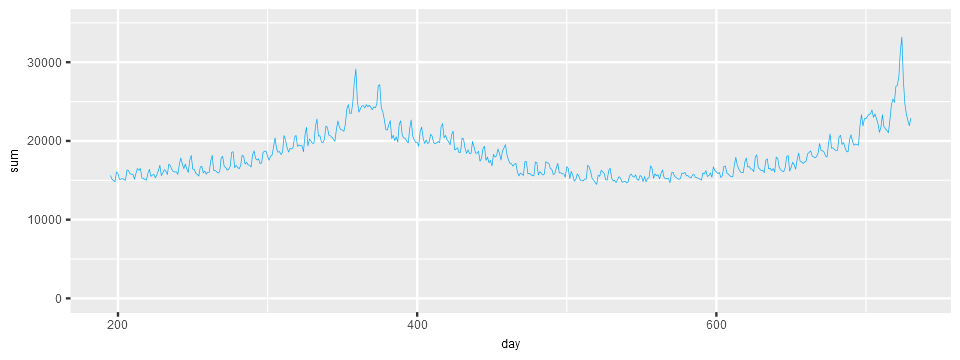

In [28]:
ggplot(data.ok.day) +
geom_line(aes(x=day, y=sum), color=PALETTE[1]) +
ylim(0,35000)

<br>
### Compare the 3 Versions of Data at Daily Resolution
___

#### Compare dataset at daily resolution based on assumed 48 intervals per day vs. dataset adjusted for dayligtht savings time changes. 

Plot aggregate electricity usage vs. time, datasets overlayed, scaled vertically 0 to 35,000.  Note, plots are offset from each other for part of the time.

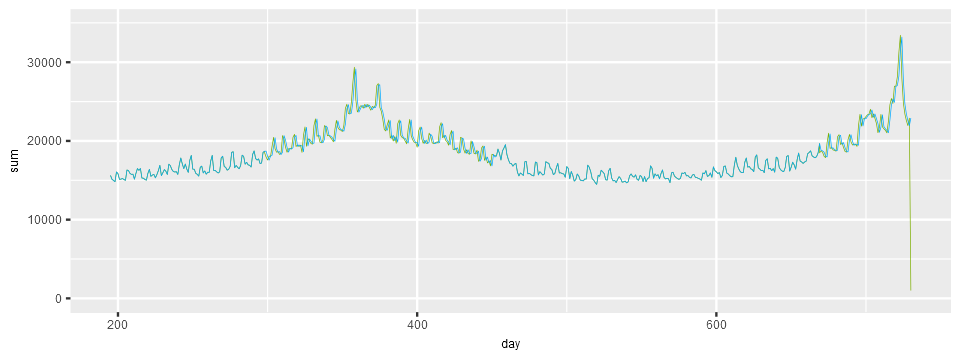

In [29]:
ggplot() +
geom_line(aes(x=day, y=sum), data=data.day.based_on_48, color=PALETTE[3]) +
geom_line(aes(x=day, y=sum), data=data.ok.day, color=PALETTE[1]) +
ylim(0,35000)

#### Compare dataset at daily resolution based on assumed 48 intervals per day vs. dataset adjusted for dayligtht savings time changes. 

Plot aggregate electricity usage vs. time, datasets overlayed, scaled horizontally 275 to 325 and vertically 15,000 to 23,000.  Mark beginning of each week.  Note, plots are offset from each other part of the time, causing very different interpretations of electricity usage by day of week.

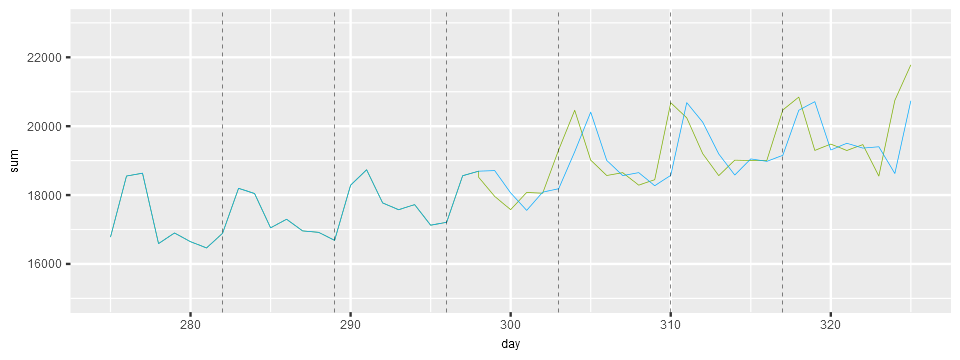

In [30]:
ggplot() +
geom_line(aes(x=day, y=sum), data=data.day.based_on_48, na.rm=TRUE, color=PALETTE[3]) +
geom_line(aes(x=day, y=sum), data=data.ok.day, na.rm=TRUE, color=PALETTE[1]) +
geom_vline(aes(xintercept=282), size=0.1, lty="dashed") +
geom_vline(aes(xintercept=289), size=0.1, lty="dashed") +
geom_vline(aes(xintercept=296), size=0.1, lty="dashed") +
geom_vline(aes(xintercept=303), size=0.1, lty="dashed") +
geom_vline(aes(xintercept=310), size=0.1, lty="dashed") +
geom_vline(aes(xintercept=317), size=0.1, lty="dashed") +
xlim(275,325) + ylim(15000,23000)

<br>
#### Compare dataset at daily resolution based on variable number of intervals per day vs. dataset adjusted for dayligtht savings time changes. 

Plot aggregate electricity usage vs. time, datasets overlayed, scaled vertically to range from 0 to 35,000.

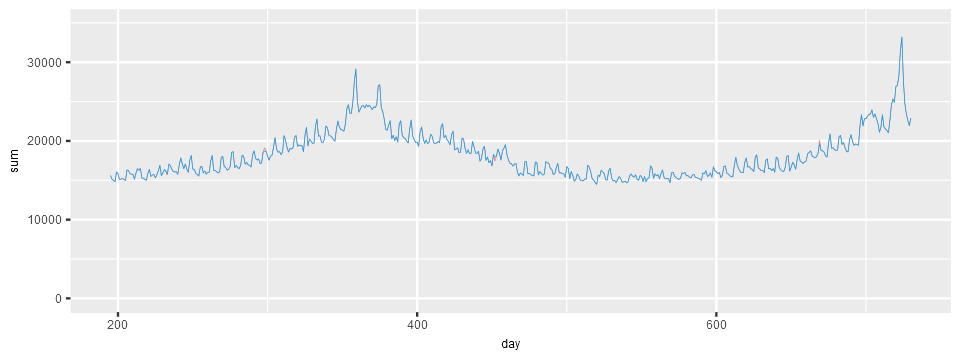

In [31]:
ggplot() +
geom_line(aes(x=day, y=sum), data=data.day.based_on_label, color=PALETTE[2]) +
geom_line(aes(x=day, y=sum), data=data.ok.day, color=PALETTE[1]) +
ylim(0,35000)

<br>
#### Compare dataset at daily resolution based on variable number of intervals per day vs. dataset adjusted for dayligtht savings time changes. 

Plot aggregate electricity usage vs. time, datasets overlayed, scaled horizontally 275 to 325 and vertically 15,000 to 23,000.  Mark beginning of each week.

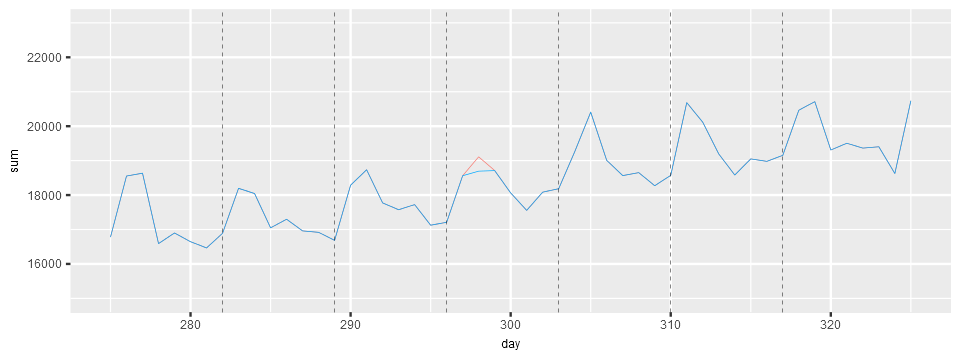

In [32]:
ggplot() +
geom_line(aes(x=day, y=sum), data=data.day.based_on_label, na.rm=TRUE, color=PALETTE[2]) +
geom_line(aes(x=day, y=sum), data=data.ok.day, na.rm=TRUE, color=PALETTE[1]) +
geom_vline(aes(xintercept=282), size=0.1, lty="dashed") +
geom_vline(aes(xintercept=289), size=0.1, lty="dashed") +
geom_vline(aes(xintercept=296), size=0.1, lty="dashed") +
geom_vline(aes(xintercept=303), size=0.1, lty="dashed") +
geom_vline(aes(xintercept=310), size=0.1, lty="dashed") +
geom_vline(aes(xintercept=317), size=0.1, lty="dashed") +
xlim(275,325) + ylim(15000,23000)

<br>
### Discussion
___
* Discussion coming soon ...

<br>
### Expectations
___
You should be be able to demonstrate an understanding of ...
* ... how to reform data from long form to cross-tabulated form, conceptually
* ... how to reform data from long form to cross-tabulated form, using R dcast function
* ... given a table, how to impute missing values in various ways, conceptually
* ... given a table, how to impute missing values in various ways, using R
* ... the overall approach and specific steps used in this analysis lab, conceptually
* ... trtade-offs between using data with missing values vs. imputed values, conceptually

<br>
### Further Reading
___
* References coming soon ...

$\tiny \text{Copyright (c) Berkeley Data Analytics Group, LLC}$